<a href="https://colab.research.google.com/github/rajesh0305/Deep_Learning_Work/blob/main/Copy_of_Gaussian_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Simple Gaussian Filter Demo



=== SIMPLE GAUSSIAN FILTER DEMO ===
Original 10x10 image:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

After Gaussian filter (sigma=1):
[[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.001 0.003 0.003 0.001 0.    0.    0.   ]
 [0.    0.    0.003 0.017 0.037 0.037 0.017 0.003 0.    0.   ]
 [0.    0.001 0.017 0.088 0.19  0.19  0.088 0.017 0.001 0.   ]
 [0.    0.003 0.037 0.19  0.411 0.411 0.19  0.037 0.003 0.   ]
 [0.    0.003 0.037 0.19  0.411 0.411 0.19  0.037 0.003 0.   ]
 [0.    0.001 0.017 0.088 0.19  0.19  0.088 0.017 0.001 0.   ]
 [0.    0.    0.003 0.017 0.037 0.037 0.017 0.003 0.    0.   ]
 [0.    0.    0.    0.001 0.003 0.003 0.001 0.    0.    0.   ]
 [0.    0.

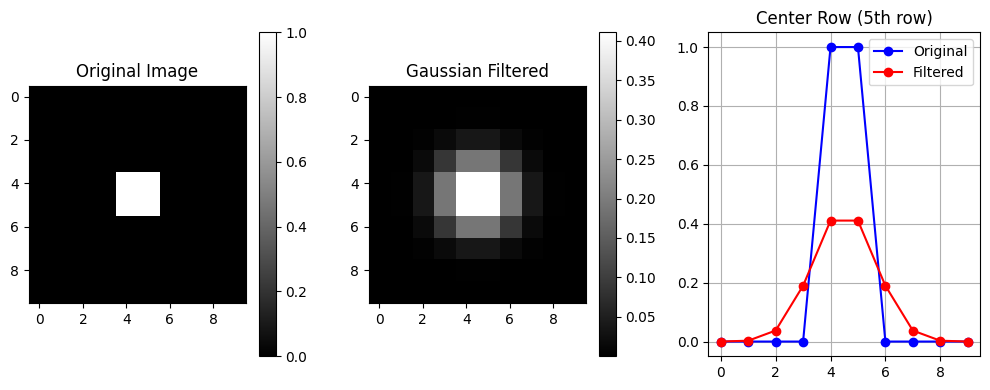

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

print("=== SIMPLE GAUSSIAN FILTER DEMO ===")

# Create a simple 10x10 test image with a bright pixel in the middle
image = np.zeros((10, 10))
image[4:6, 4:6] = 1  # Add a 2x2 bright square in the center

print("Original 10x10 image:")
print(image)

# Apply Gaussian filter with sigma=1
filtered = gaussian_filter(image, sigma=1)

print("\nAfter Gaussian filter (sigma=1):")
print(np.round(filtered, 3))

# Visualize
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(filtered, cmap='gray')
plt.title('Gaussian Filtered')
plt.colorbar()

# Show 1D slice through the center
plt.subplot(1, 3, 3)
plt.plot(image[5, :], 'bo-', label='Original')
plt.plot(filtered[5, :], 'ro-', label='Filtered')
plt.title('Center Row (5th row)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Basic Demo with Different Sigma Values

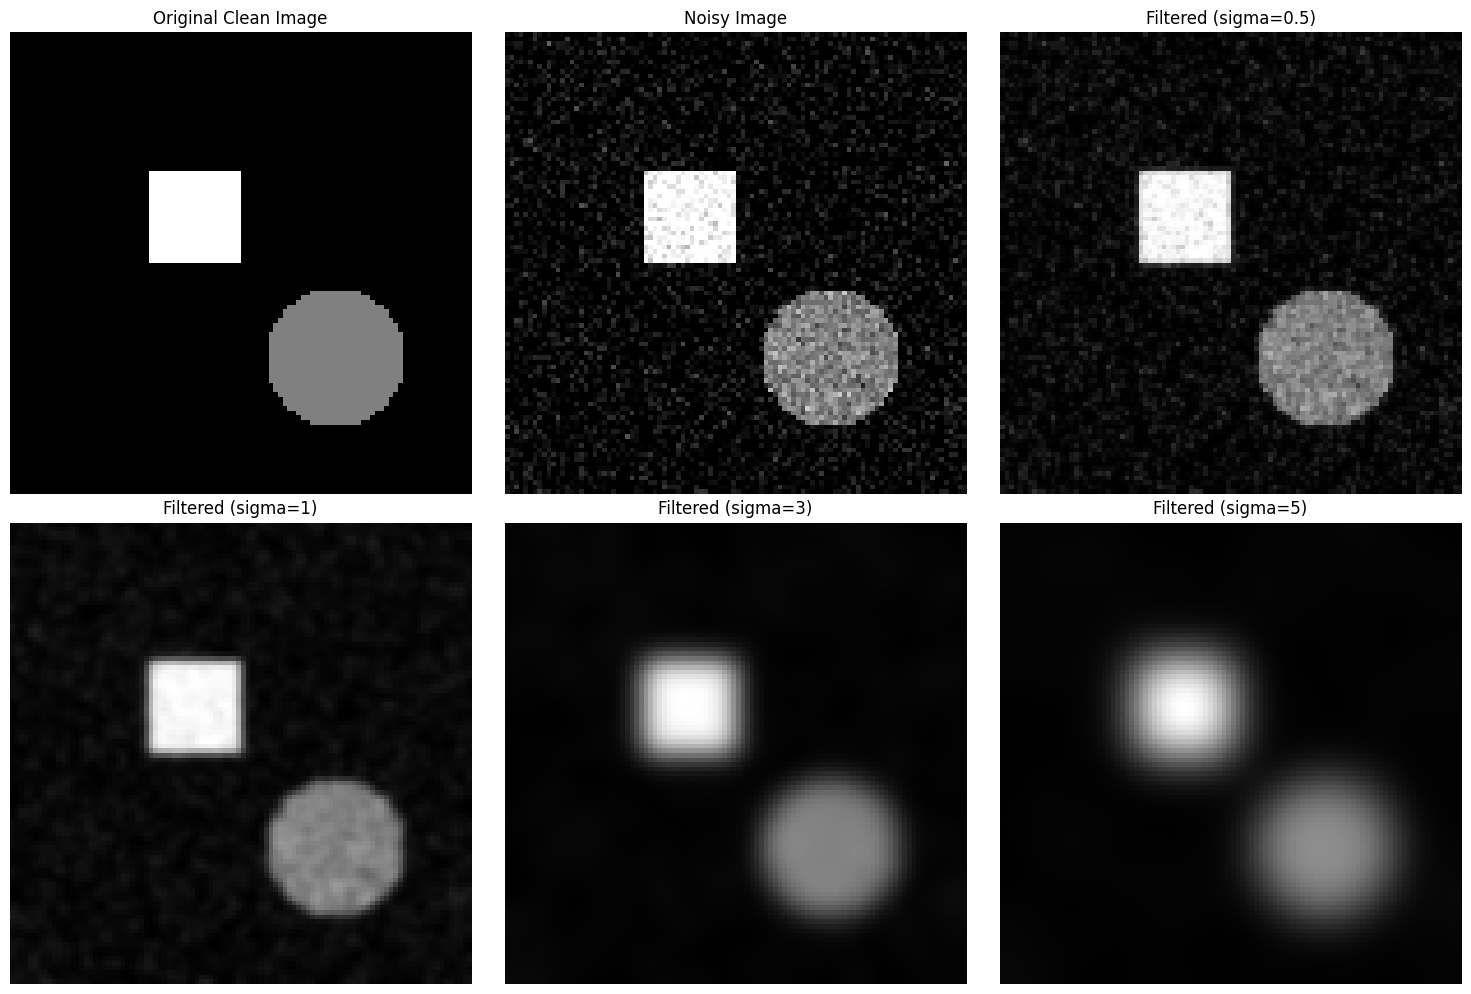

Effect of different sigma values:
- Small sigma (0.5): Removes little noise, preserves edges
- Medium sigma (1-3): Good balance of noise removal and edge preservation
- Large sigma (5+): Heavy smoothing, blurs edges


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Create a simple test pattern
size = 100
image = np.zeros((size, size))

# Add a white square
image[30:50, 30:50] = 1

# Add a circle
center_x, center_y = 70, 70
radius = 15
for i in range(size):
    for j in range(size):
        if (i-center_x)**2 + (j-center_y)**2 < radius**2:
            image[i, j] = 0.5

# Add some noise
np.random.seed(42)
noise = np.random.randn(size, size) * 0.1
image_with_noise = image + noise
image_with_noise = np.clip(image_with_noise, 0, 1)

# Apply Gaussian filter with different sigma values
plt.figure(figsize=(15, 10))

# Original
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Clean Image')
plt.axis('off')

# Noisy
plt.subplot(2, 3, 2)
plt.imshow(image_with_noise, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

# Filtered with sigma=0.5
filtered_small = gaussian_filter(image_with_noise, sigma=0.5)
plt.subplot(2, 3, 3)
plt.imshow(filtered_small, cmap='gray')
plt.title('Filtered (sigma=0.5)')
plt.axis('off')

# Filtered with sigma=1
filtered_medium = gaussian_filter(image_with_noise, sigma=1)
plt.subplot(2, 3, 4)
plt.imshow(filtered_medium, cmap='gray')
plt.title('Filtered (sigma=1)')
plt.axis('off')

# Filtered with sigma=3
filtered_large = gaussian_filter(image_with_noise, sigma=3)
plt.subplot(2, 3, 5)
plt.imshow(filtered_large, cmap='gray')
plt.title('Filtered (sigma=3)')
plt.axis('off')

# Filtered with sigma=5
filtered_huge = gaussian_filter(image_with_noise, sigma=5)
plt.subplot(2, 3, 6)
plt.imshow(filtered_huge, cmap='gray')
plt.title('Filtered (sigma=5)')
plt.axis('off')

plt.tight_layout()
plt.show()

print("Effect of different sigma values:")
print("- Small sigma (0.5): Removes little noise, preserves edges")
print("- Medium sigma (1-3): Good balance of noise removal and edge preservation")
print("- Large sigma (5+): Heavy smoothing, blurs edges")

# Step-by-Step Understanding

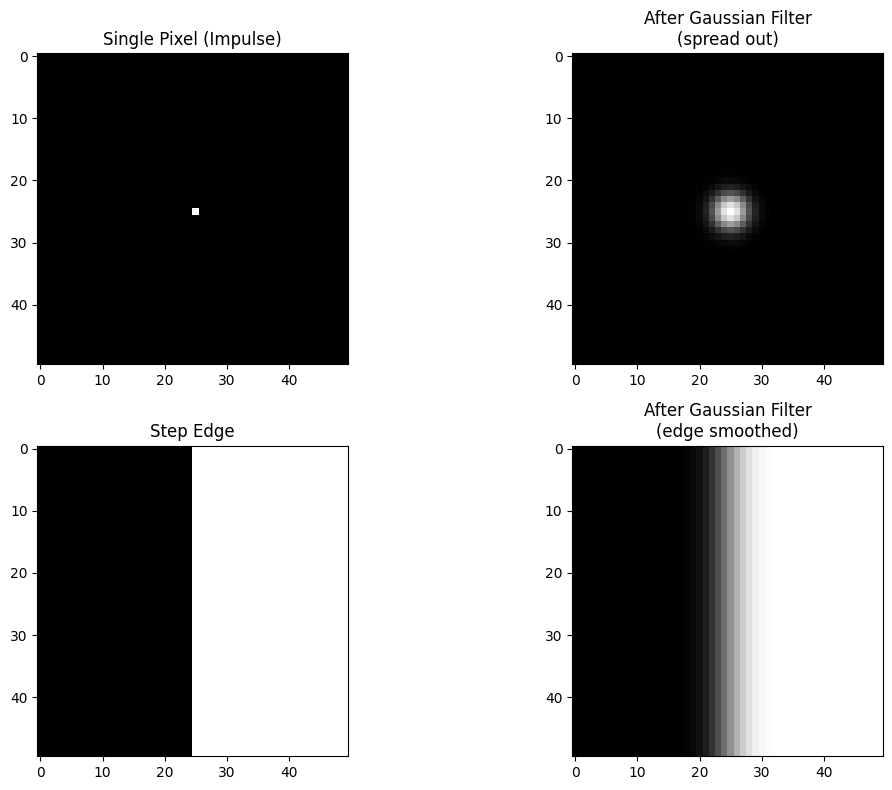

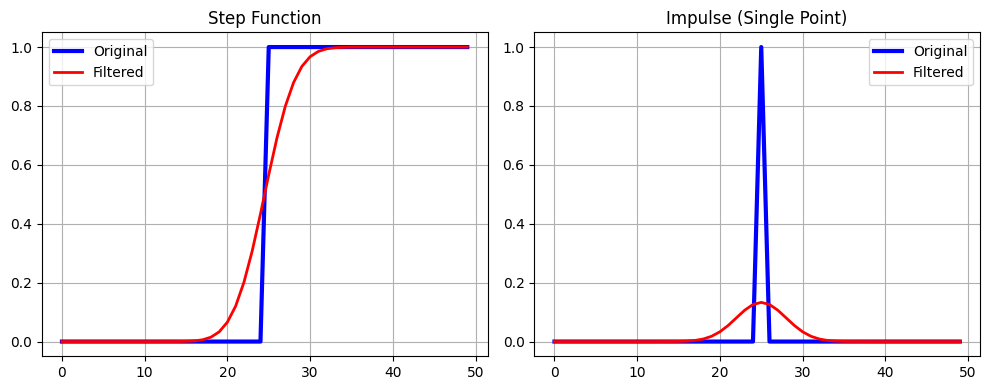

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Show what Gaussian filtering does to different patterns
fig = plt.figure(figsize=(12, 8))

# 1. Single pixel impulse
impulse = np.zeros((50, 50))
impulse[25, 25] = 1

plt.subplot(2, 2, 1)
plt.imshow(impulse, cmap='gray')
plt.title('Single Pixel (Impulse)')

impulse_filtered = gaussian_filter(impulse, sigma=2)
plt.subplot(2, 2, 2)
plt.imshow(impulse_filtered, cmap='gray')
plt.title('After Gaussian Filter\n(spread out)')

# 2. Step edge
edge = np.zeros((50, 50))
edge[:, 25:] = 1

plt.subplot(2, 2, 3)
plt.imshow(edge, cmap='gray')
plt.title('Step Edge')

edge_filtered = gaussian_filter(edge, sigma=3)
plt.subplot(2, 2, 4)
plt.imshow(edge_filtered, cmap='gray')
plt.title('After Gaussian Filter\n(edge smoothed)')

plt.tight_layout()
plt.show()

# Show 1D versions for clarity
plt.figure(figsize=(10, 4))

# 1D step function
x = np.linspace(0, 49, 50)
step_1d = np.zeros(50)
step_1d[25:] = 1

plt.subplot(1, 2, 1)
plt.plot(x, step_1d, 'b-', linewidth=3, label='Original')
step_filtered = gaussian_filter(step_1d, sigma=3)
plt.plot(x, step_filtered, 'r-', linewidth=2, label='Filtered')
plt.title('Step Function')
plt.legend()
plt.grid(True)

# 1D impulse
impulse_1d = np.zeros(50)
impulse_1d[25] = 1

plt.subplot(1, 2, 2)
plt.plot(x, impulse_1d, 'b-', linewidth=3, label='Original')
impulse_filtered_1d = gaussian_filter(impulse_1d, sigma=3)
plt.plot(x, impulse_filtered_1d, 'r-', linewidth=2, label='Filtered')
plt.title('Impulse (Single Point)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Realistic Noise Reduction Example

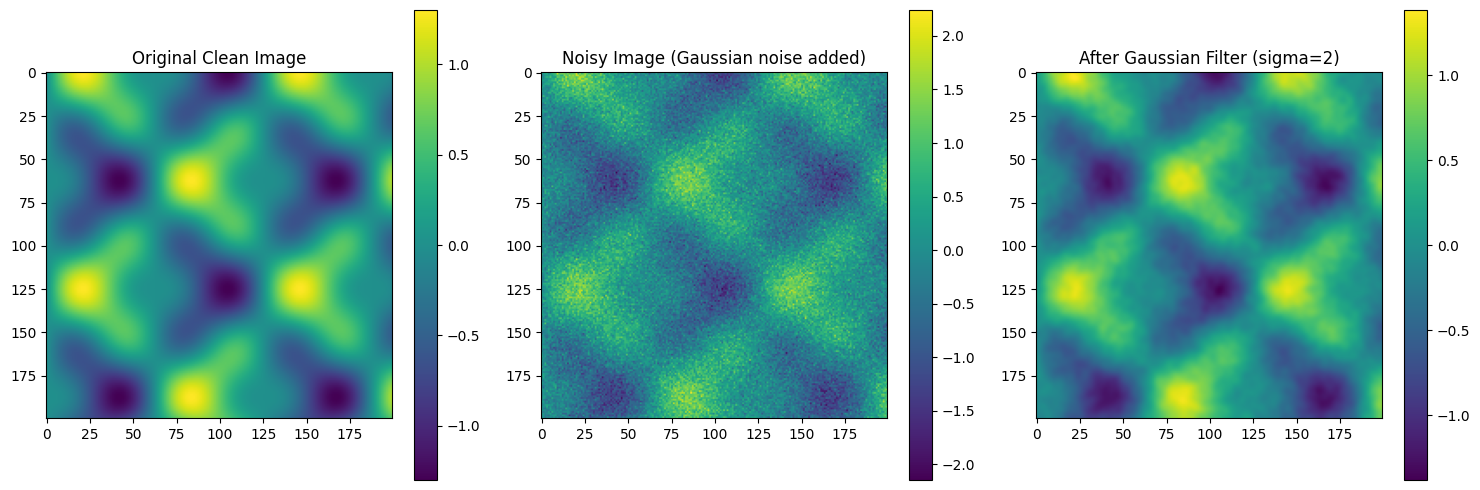

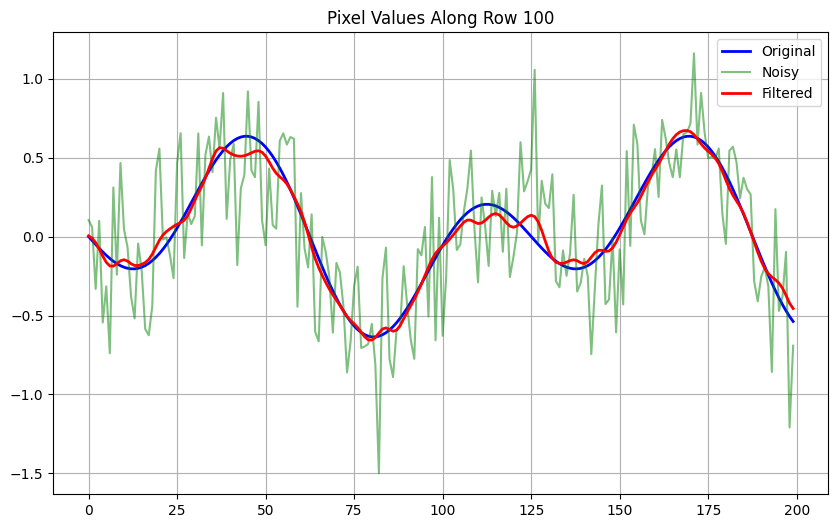

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Create a clean test image
x = np.linspace(0, 10, 200)
y = np.linspace(0, 10, 200)
X, Y = np.meshgrid(x, y)

# Create an image with patterns
image = np.sin(X) * np.cos(Y) + 0.5 * np.sin(2*X) * np.cos(2*Y)

# Add strong noise
np.random.seed(42)
noisy_image = image + np.random.randn(200, 200) * 0.3

# Apply Gaussian filter
filtered_image = gaussian_filter(noisy_image, sigma=2)

# Display results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='viridis')
plt.title('Original Clean Image')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='viridis')
plt.title('Noisy Image (Gaussian noise added)')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow(filtered_image, cmap='viridis')
plt.title('After Gaussian Filter (sigma=2)')
plt.colorbar()

plt.tight_layout()
plt.show()

# Compare pixel values along a line
plt.figure(figsize=(10, 6))
plt.plot(image[100, :], 'b-', linewidth=2, label='Original')
plt.plot(noisy_image[100, :], 'g-', alpha=0.5, label='Noisy')
plt.plot(filtered_image[100, :], 'r-', linewidth=2, label='Filtered')
plt.title('Pixel Values Along Row 100')
plt.legend()
plt.grid(True)
plt.show()

# Minimal Working Example

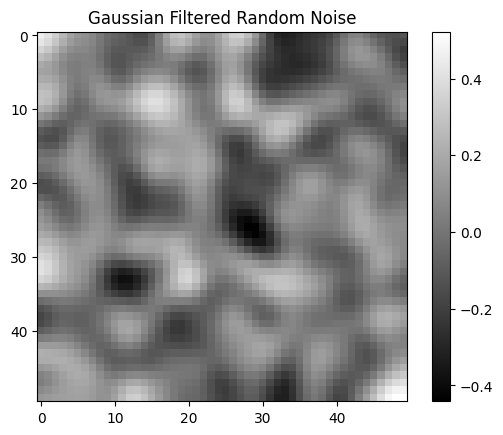

In [ ]:
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

# Create, filter, and display in 3 lines
image = np.random.randn(50, 50)  # Random noise
filtered = gaussian_filter(image, sigma=2)  # Apply filter

plt.imshow(filtered, cmap='gray')
plt.title('Gaussian Filtered Random Noise')
plt.colorbar()
plt.show()

# 1 Complete Manual Gaussian Filter Calculation

In [ ]:
import numpy as np
import math

def calculate_gaussian_kernel_manual(size, sigma):
    """Step-by-step Gaussian kernel calculation"""
    print(f"\n{'='*60}")
    print(f"STEP-BY-STEP CALCULATION OF {size}×{size} GAUSSIAN KERNEL (σ={sigma})")
    print('='*60)

    # Step 1: Create coordinate grid
    center = size // 2
    print(f"\n1. Creating coordinate grid (center at ({center},{center})):")

    coordinates = []
    for i in range(size):
        row = []
        for j in range(size):
            x = i - center
            y = j - center
            row.append((x, y))
        coordinates.append(row)

    print("Coordinates (x,y) from center:")
    for row in coordinates:
        print("  " + str(row))

    # Step 2: Calculate unnormalized Gaussian values
    print(f"\n2. Calculating unnormalized Gaussian values:")
    print(f"   Formula: G(x,y) = exp(-(x² + y²)/(2σ²)) where σ={sigma}")
    print(f"   For example, at position (0,0):")
    print(f"   G(0,0) = exp(-(0² + 0²)/(2×{sigma}²)) = exp(0) = 1.0")

    kernel = np.zeros((size, size))
    print(f"\n   All unnormalized values:")
    for i in range(size):
        for j in range(size):
            x, y = coordinates[i][j]
            exponent = -(x**2 + y**2) / (2 * sigma**2)
            value = math.exp(exponent)
            kernel[i, j] = value
            print(f"   G({x},{y}) = exp(-({x}²+{y}²)/(2×{sigma}²)) = exp({exponent:.4f}) = {value:.4f}")

    print(f"\n   Unnormalized kernel matrix:")
    for row in kernel:
        print("   " + " ".join(f"{val:.4f}" for val in row))

    # Step 3: Calculate sum for normalization
    kernel_sum = np.sum(kernel)
    print(f"\n3. Sum of all values = {kernel_sum:.6f}")

    # Step 4: Normalize the kernel
    print(f"\n4. Normalizing (dividing each value by {kernel_sum:.6f}):")
    normalized_kernel = kernel / kernel_sum

    print(f"\n   Normalized kernel matrix (sum = {np.sum(normalized_kernel):.6f}):")
    for i, row in enumerate(normalized_kernel):
        row_str = "   "
        for j, val in enumerate(row):
            x, y = coordinates[i][j]
            row_str += f"G({x},{y})={val:.4f}  "
        print(row_str)

    return normalized_kernel

# Test with different kernel sizes and sigmas
print("EXAMPLE 1: 3×3 kernel with σ=1.0")
kernel_3x3 = calculate_gaussian_kernel_manual(3, 1.0)

print("\n\n" + "="*60)
print("EXAMPLE 2: 5×5 kernel with σ=1.5")
kernel_5x5 = calculate_gaussian_kernel_manual(5, 1.5)

EXAMPLE 1: 3×3 kernel with σ=1.0

STEP-BY-STEP CALCULATION OF 3×3 GAUSSIAN KERNEL (σ=1.0)

1. Creating coordinate grid (center at (1,1)):
Coordinates (x,y) from center:
  [(-1, -1), (-1, 0), (-1, 1)]
  [(0, -1), (0, 0), (0, 1)]
  [(1, -1), (1, 0), (1, 1)]

2. Calculating unnormalized Gaussian values:
   Formula: G(x,y) = exp(-(x² + y²)/(2σ²)) where σ=1.0
   For example, at position (0,0):
   G(0,0) = exp(-(0² + 0²)/(2×1.0²)) = exp(0) = 1.0

   All unnormalized values:
   G(-1,-1) = exp(-(-1²+-1²)/(2×1.0²)) = exp(-1.0000) = 0.3679
   G(-1,0) = exp(-(-1²+0²)/(2×1.0²)) = exp(-0.5000) = 0.6065
   G(-1,1) = exp(-(-1²+1²)/(2×1.0²)) = exp(-1.0000) = 0.3679
   G(0,-1) = exp(-(0²+-1²)/(2×1.0²)) = exp(-0.5000) = 0.6065
   G(0,0) = exp(-(0²+0²)/(2×1.0²)) = exp(0.0000) = 1.0000
   G(0,1) = exp(-(0²+1²)/(2×1.0²)) = exp(-0.5000) = 0.6065
   G(1,-1) = exp(-(1²+-1²)/(2×1.0²)) = exp(-1.0000) = 0.3679
   G(1,0) = exp(-(1²+0²)/(2×1.0²)) = exp(-0.5000) = 0.6065
   G(1,1) = exp(-(1²+1²)/(2×1.0²)) = exp(-1.

# 2. Visualizing the Gaussian Kernel


VISUALIZING DIFFERENT GAUSSIAN KERNELS


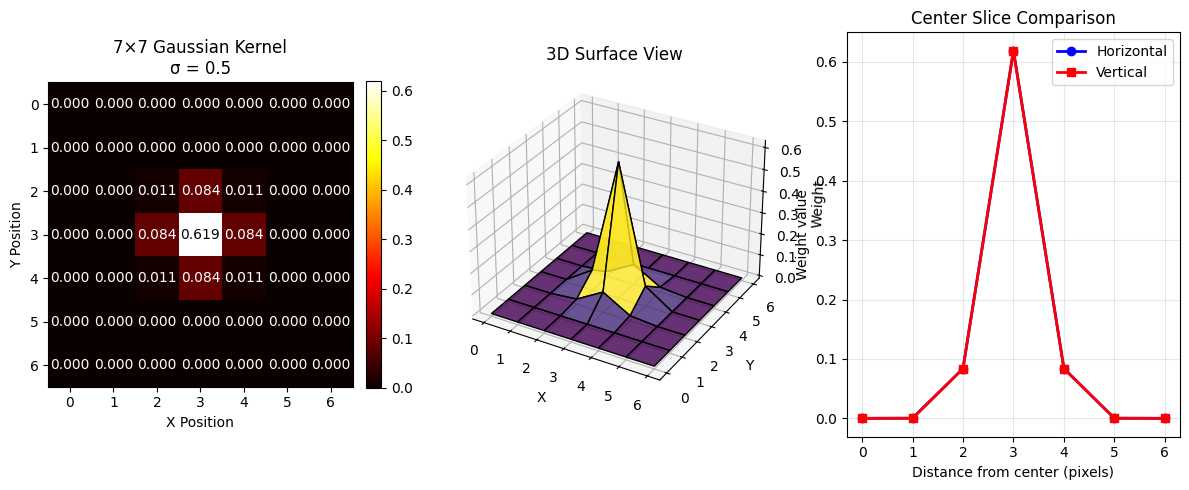


Kernel Properties:
  Size: 7×7
  Sigma: 0.5
  Center weight: 0.6187
  Sum of weights: 1.000000
  Minimum weight: 0.0000
  Maximum weight: 0.6187
  Theoretical FWHM: 1.18 pixels


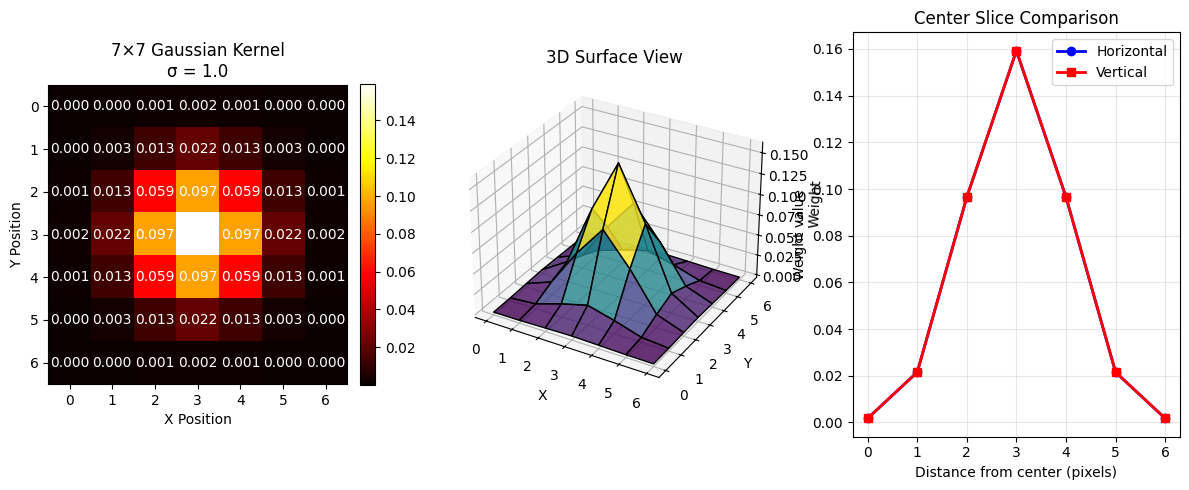


Kernel Properties:
  Size: 7×7
  Sigma: 1.0
  Center weight: 0.1592
  Sum of weights: 1.000000
  Minimum weight: 0.0000
  Maximum weight: 0.1592
  Theoretical FWHM: 2.35 pixels


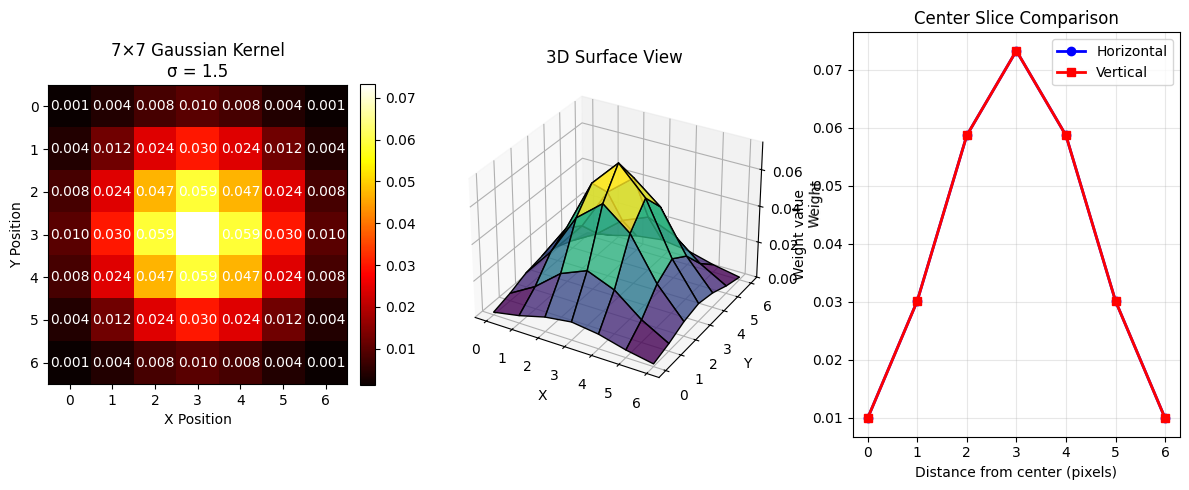


Kernel Properties:
  Size: 7×7
  Sigma: 1.5
  Center weight: 0.0733
  Sum of weights: 1.000000
  Minimum weight: 0.0013
  Maximum weight: 0.0733
  Theoretical FWHM: 3.53 pixels


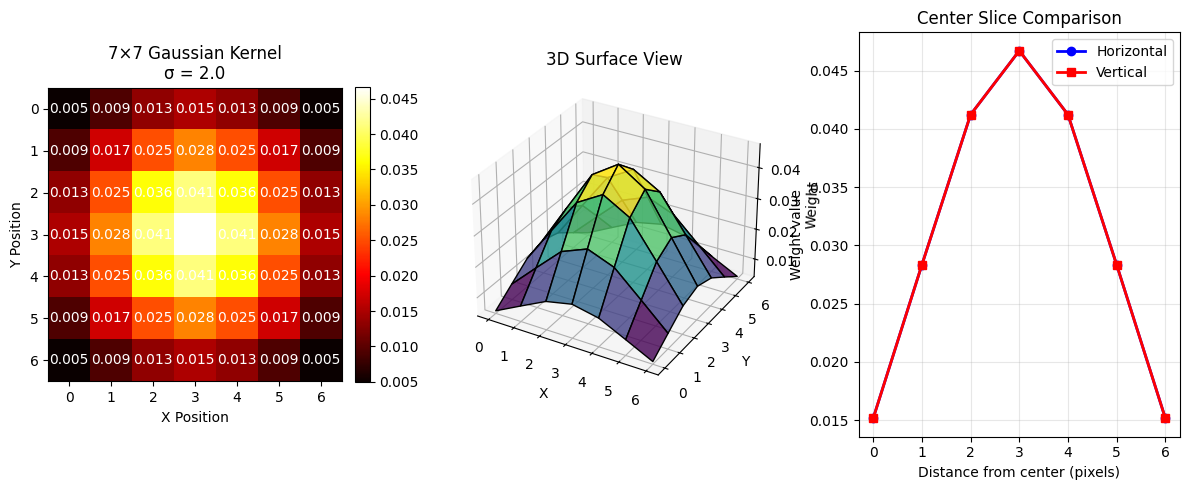


Kernel Properties:
  Size: 7×7
  Sigma: 2.0
  Center weight: 0.0467
  Sum of weights: 1.000000
  Minimum weight: 0.0049
  Maximum weight: 0.0467
  Theoretical FWHM: 4.71 pixels


In [ ]:
import matplotlib.pyplot as plt

def visualize_gaussian_kernel(kernel, sigma):
    """Visualize Gaussian kernel in 2D and 3D"""
    size = kernel.shape[0]

    fig = plt.figure(figsize=(12, 5))

    # 2D Heatmap
    ax1 = plt.subplot(1, 3, 1)
    im = ax1.imshow(kernel, cmap='hot', interpolation='nearest')
    plt.colorbar(im, ax=ax1, fraction=0.046, pad=0.04)
    ax1.set_title(f'{size}×{size} Gaussian Kernel\nσ = {sigma}')
    ax1.set_xlabel('X Position')
    ax1.set_ylabel('Y Position')

    # Add text values
    for i in range(size):
        for j in range(size):
            ax1.text(j, i, f'{kernel[i,j]:.3f}',
                    ha='center', va='center',
                    color='white' if kernel[i,j] < 0.5 else 'black')

    # 3D Surface plot
    ax2 = plt.subplot(1, 3, 2, projection='3d')
    x = np.arange(size)
    y = np.arange(size)
    X, Y = np.meshgrid(x, y)
    ax2.plot_surface(X, Y, kernel, cmap='viridis',
                    edgecolor='black', alpha=0.8)
    ax2.set_title('3D Surface View')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Weight')

    # 1D Slice through center
    ax3 = plt.subplot(1, 3, 3)
    center = size // 2
    horizontal_slice = kernel[center, :]
    vertical_slice = kernel[:, center]

    ax3.plot(horizontal_slice, 'b-o', label='Horizontal', linewidth=2, markersize=6)
    ax3.plot(vertical_slice, 'r-s', label='Vertical', linewidth=2, markersize=6)
    ax3.set_title('Center Slice Comparison')
    ax3.set_xlabel('Distance from center (pixels)')
    ax3.set_ylabel('Weight value')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Print kernel properties
    print(f"\nKernel Properties:")
    print(f"  Size: {size}×{size}")
    print(f"  Sigma: {sigma}")
    print(f"  Center weight: {kernel[center, center]:.4f}")
    print(f"  Sum of weights: {np.sum(kernel):.6f}")
    print(f"  Minimum weight: {np.min(kernel):.4f}")
    print(f"  Maximum weight: {kernel[center, center]:.4f}")

    # Calculate effective width (FWHM - Full Width at Half Maximum)
    half_max = kernel[center, center] / 2
    width = np.sqrt(8 * np.log(2)) * sigma
    print(f"  Theoretical FWHM: {width:.2f} pixels")

# Visualize different kernels
print("\n" + "="*60)
print("VISUALIZING DIFFERENT GAUSSIAN KERNELS")
print("="*60)

# Create and visualize different kernels
sigmas = [0.5, 1.0, 1.5, 2.0]
for sigma in sigmas:
    size = 7  # Fixed size for comparison
    kernel = np.zeros((size, size))
    center = size // 2

    for i in range(size):
        for j in range(size):
            x = i - center
            y = j - center
            kernel[i, j] = math.exp(-(x**2 + y**2) / (2 * sigma**2))

    kernel = kernel / np.sum(kernel)  # Normalize

    visualize_gaussian_kernel(kernel, sigma)

# 3. Manual Convolution with Gaussian Filter

In [ ]:
def apply_gaussian_filter_manual(image, kernel, verbose=True):
    """Apply Gaussian filter manually with step-by-step explanation"""
    if verbose:
        print(f"\n{'='*60}")
        print("MANUAL CONVOLUTION: APPLYING GAUSSIAN FILTER")
        print('='*60)
        print(f"Image shape: {image.shape}")
        print(f"Kernel shape: {kernel.shape}")

    kernel_size = kernel.shape[0]
    pad_size = kernel_size // 2
    image_h, image_w = image.shape

    # Pad the image
    padded_image = np.pad(image, pad_size, mode='constant', constant_values=0)

    if verbose:
        print(f"\n1. Padded image (from {image.shape} to {padded_image.shape}):")
        print(padded_image)

    # Create output image
    output = np.zeros_like(image, dtype=float)

    if verbose:
        print(f"\n2. Performing convolution:")

    # Perform convolution
    for i in range(image_h):
        for j in range(image_w):
            if verbose and i == image_h//2 and j == image_w//2:
                print(f"\n   Processing pixel at position ({i},{j}):")

            # Extract the region from padded image
            region = padded_image[i:i+kernel_size, j:j+kernel_size]

            if verbose and i == image_h//2 and j == image_w//2:
                print(f"   - Region extracted:")
                for row in region:
                    print("     " + " ".join(f"{val:3.0f}" for val in row))

            # Multiply with kernel
            weighted_region = region * kernel

            if verbose and i == image_h//2 and j == image_w//2:
                print(f"\n   - After multiplication with kernel:")
                for row_idx, row in enumerate(weighted_region):
                    row_str = "     "
                    for col_idx, val in enumerate(row):
                        row_str += f"{val:6.3f} "
                    print(row_str)

            # Sum all values
            result = np.sum(weighted_region)
            output[i, j] = result

            if verbose and i == image_h//2 and j == image_w//2:
                print(f"\n   - Sum of weighted values: {result:.3f}")
                print(f"   - Output pixel value at ({i},{j}): {result:.3f}")

    if verbose:
        print(f"\n3. Final filtered image:")
        print(output)

    return output

# Create a test image
test_image = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],  # Single bright pixel
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0]
])

# Create a simple 3x3 Gaussian kernel
kernel_3x3 = np.array([
    [1/16, 2/16, 1/16],
    [2/16, 4/16, 2/16],
    [1/16, 2/16, 1/16]
])

print("Original test image (7×7):")
print(test_image)

print("\nGaussian kernel (3×3 approximation):")
print(kernel_3x3)

# Apply filter manually
filtered = apply_gaussian_filter_manual(test_image, kernel_3x3, verbose=True)

# Compare with scipy's implementation
from scipy.ndimage import convolve
scipy_filtered = convolve(test_image, kernel_3x3, mode='constant', cval=0)

print("\n" + "="*60)
print("COMPARISON WITH SCIPY'S IMPLEMENTATION")
print("="*60)
print("\nManual convolution result:")
print(np.round(filtered, 3))

print("\nScipy convolution result:")
print(np.round(scipy_filtered, 3))

print("\nDifference (should be all zeros):")
print(np.round(filtered - scipy_filtered, 10))

Original test image (7×7):
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]

Gaussian kernel (3×3 approximation):
[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]

MANUAL CONVOLUTION: APPLYING GAUSSIAN FILTER
Image shape: (7, 7)
Kernel shape: (3, 3)

1. Padded image (from (7, 7) to (9, 9)):
[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]

2. Performing convolution:

   Processing pixel at position (3,3):
   - Region extracted:
       0   0   0
       0   1   0
       0   0   0

   - After multiplication with kernel:
      0.000  0.000  0.000 
      0.000  0.250  0.000 
      0.000  0.000  0.000 

   - Sum of weighted values: 0.250
   - Output pixel value at (3,3): 0.250

3. Final filtered image:
[[0.     0.     0.     0.     0.     0.     0.    ]
 [0.  

# 4. Complete Example with Real Image


COMPLETE GAUSSIAN FILTER DEMONSTRATION

1. Creating test patterns...

2. Creating Gaussian kernels...

   Small kernel (3×3, σ=0.5):
[[0.011 0.084 0.011]
 [0.084 0.619 0.084]
 [0.011 0.084 0.011]]

   Medium kernel (5×5, σ=1.0):
[[0.003 0.013 0.022 0.013 0.003]
 [0.013 0.06  0.098 0.06  0.013]
 [0.022 0.098 0.162 0.098 0.022]
 [0.013 0.06  0.098 0.06  0.013]
 [0.003 0.013 0.022 0.013 0.003]]

   Large kernel (7×7, σ=2.0):
[[0.005 0.009 0.013 0.015 0.013 0.009 0.005]
 [0.009 0.017 0.025 0.028 0.025 0.017 0.009]
 [0.013 0.025 0.036 0.041 0.036 0.025 0.013]
 [0.015 0.028 0.041 0.047 0.041 0.028 0.015]
 [0.013 0.025 0.036 0.041 0.036 0.025 0.013]
 [0.009 0.017 0.025 0.028 0.025 0.017 0.009]
 [0.005 0.009 0.013 0.015 0.013 0.009 0.005]]

3. Applying Gaussian filters to test patterns...

4. Displaying results...


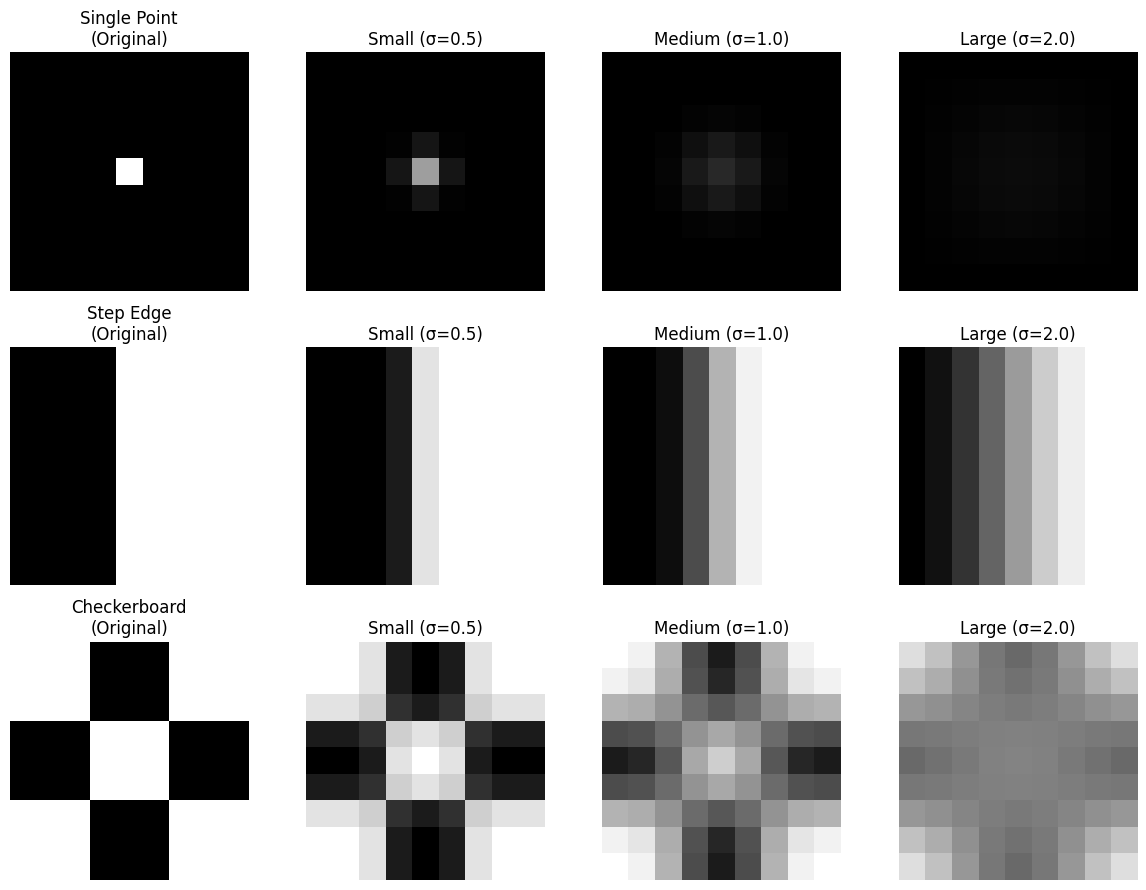


5. 1D Analysis of Gaussian Filtering...


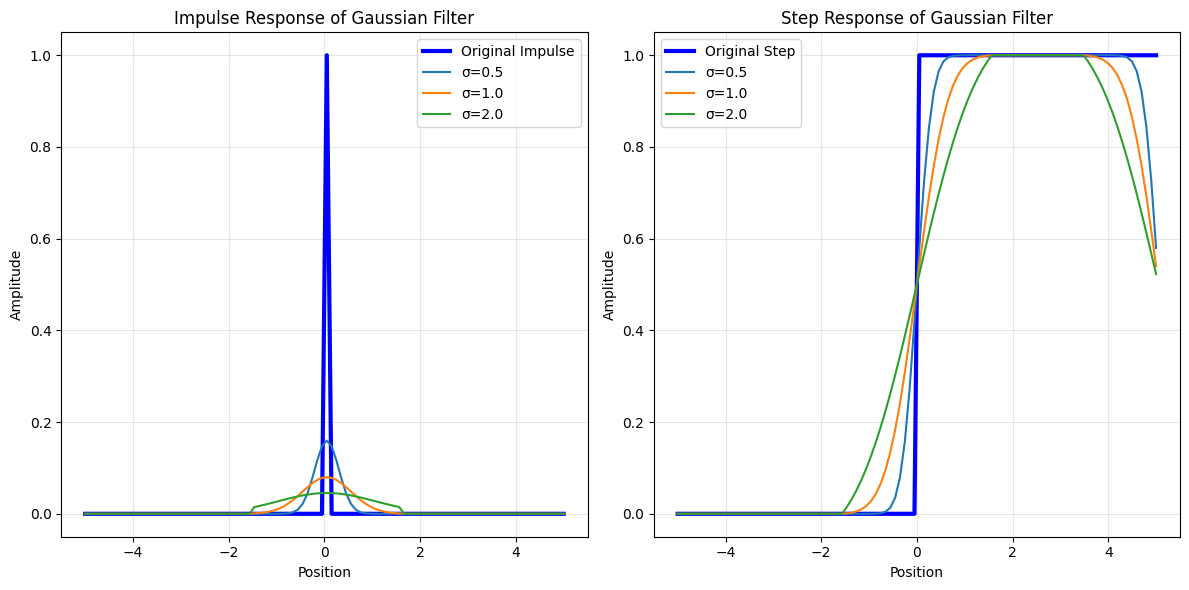


DEMONSTRATION COMPLETE!


In [ ]:
def complete_gaussian_demo():
    """Complete demo with custom Gaussian implementation"""
    print("\n" + "="*70)
    print("COMPLETE GAUSSIAN FILTER DEMONSTRATION")
    print("="*70)

    # Step 1: Create a Gaussian kernel function
    def create_gaussian_kernel(size, sigma):
        """Create Gaussian kernel with given size and sigma"""
        kernel = np.zeros((size, size))
        center = size // 2

        for i in range(size):
            for j in range(size):
                x = i - center
                y = j - center
                # Gaussian formula
                kernel[i, j] = np.exp(-(x**2 + y**2) / (2 * sigma**2))

        # Normalize so sum = 1
        return kernel / np.sum(kernel)

    # Step 2: Create convolution function
    def convolve_2d(image, kernel):
        """2D convolution implementation"""
        kernel_size = kernel.shape[0]
        pad_size = kernel_size // 2

        # Pad image
        padded = np.pad(image, pad_size, mode='edge')
        output = np.zeros_like(image, dtype=float)

        # Perform convolution
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                region = padded[i:i+kernel_size, j:j+kernel_size]
                output[i, j] = np.sum(region * kernel)

        return output

    # Step 3: Create test patterns
    print("\n1. Creating test patterns...")

    # Pattern 1: Single point
    point_image = np.zeros((9, 9))
    point_image[4, 4] = 1

    # Pattern 2: Step edge
    edge_image = np.zeros((9, 9))
    edge_image[:, 4:] = 1

    # Pattern 3: Checkerboard
    checker_image = np.zeros((9, 9))
    for i in range(9):
        for j in range(9):
            if (i//3 + j//3) % 2 == 0:
                checker_image[i, j] = 1

    # Step 4: Create Gaussian kernels
    print("\n2. Creating Gaussian kernels...")
    kernel_small = create_gaussian_kernel(3, 0.5)
    kernel_medium = create_gaussian_kernel(5, 1.0)
    kernel_large = create_gaussian_kernel(7, 2.0)

    print(f"\n   Small kernel (3×3, σ=0.5):")
    print(np.round(kernel_small, 3))
    print(f"\n   Medium kernel (5×5, σ=1.0):")
    print(np.round(kernel_medium, 3))
    print(f"\n   Large kernel (7×7, σ=2.0):")
    print(np.round(kernel_large, 3))

    # Step 5: Apply filters
    print("\n3. Applying Gaussian filters to test patterns...")

    results = {}
    test_images = [("Single Point", point_image),
                   ("Step Edge", edge_image),
                   ("Checkerboard", checker_image)]

    kernels = [("Small (σ=0.5)", kernel_small),
               ("Medium (σ=1.0)", kernel_medium),
               ("Large (σ=2.0)", kernel_large)]

    # Apply all combinations
    for img_name, img in test_images:
        results[img_name] = {}
        for kernel_name, kernel in kernels:
            filtered = convolve_2d(img, kernel)
            results[img_name][kernel_name] = filtered

    # Step 6: Display results
    print("\n4. Displaying results...")

    fig, axes = plt.subplots(3, 4, figsize=(12, 9))

    for row, (img_name, img) in enumerate(test_images):
        # Original image
        axes[row, 0].imshow(img, cmap='gray', vmin=0, vmax=1)
        axes[row, 0].set_title(f'{img_name}\n(Original)')
        axes[row, 0].axis('off')

        # Filtered images
        for col, (kernel_name, _) in enumerate(kernels, 1):
            filtered_img = results[img_name][kernel_name]
            axes[row, col].imshow(filtered_img, cmap='gray', vmin=0, vmax=1)
            axes[row, col].set_title(f'{kernel_name}')
            axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()

    # Step 7: Show 1D analysis
    print("\n5. 1D Analysis of Gaussian Filtering...")

    # Create 1D Gaussian function
    def gaussian_1d(x, sigma):
        return (1/(sigma*np.sqrt(2*np.pi))) * np.exp(-x**2/(2*sigma**2))

    # Create 1D signals
    x = np.linspace(-5, 5, 100)

    # Signal 1: Impulse
    impulse = np.zeros(100)
    impulse[50] = 1

    # Signal 2: Step
    step = np.zeros(100)
    step[50:] = 1

    # Create 1D Gaussian kernels
    sigmas = [0.5, 1.0, 2.0]

    plt.figure(figsize=(12, 6))

    # Plot impulse response
    plt.subplot(1, 2, 1)
    plt.plot(x, impulse, 'b-', linewidth=3, label='Original Impulse')

    for sigma in sigmas:
        # Create 1D Gaussian kernel
        kernel_1d = gaussian_1d(np.linspace(-3, 3, 31), sigma)
        kernel_1d = kernel_1d / np.sum(kernel_1d)  # Normalize

        # Convolve
        filtered = np.convolve(impulse, kernel_1d, mode='same')
        plt.plot(x, filtered, label=f'σ={sigma}')

    plt.title('Impulse Response of Gaussian Filter')
    plt.xlabel('Position')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Plot step response
    plt.subplot(1, 2, 2)
    plt.plot(x, step, 'b-', linewidth=3, label='Original Step')

    for sigma in sigmas:
        # Create 1D Gaussian kernel
        kernel_1d = gaussian_1d(np.linspace(-3, 3, 31), sigma)
        kernel_1d = kernel_1d / np.sum(kernel_1d)  # Normalize

        # Convolve
        filtered = np.convolve(step, kernel_1d, mode='same')
        plt.plot(x, filtered, label=f'σ={sigma}')

    plt.title('Step Response of Gaussian Filter')
    plt.xlabel('Position')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("\n" + "="*70)
    print("DEMONSTRATION COMPLETE!")
    print("="*70)

# Run the complete demo
complete_gaussian_demo()

# 5. Quick Reference: One-Line Functions

In [ ]:
import numpy as np
from scipy.ndimage import gaussian_filter

# One-line Gaussian kernel creation
def gaussian_kernel(size, sigma):
    """Create Gaussian kernel in one line"""
    x = np.arange(size) - size//2
    y = np.arange(size) - size//2
    X, Y = np.meshgrid(x, y)
    kernel = np.exp(-(X**2 + Y**2) / (2 * sigma**2))
    return kernel / np.sum(kernel)

# One-line convolution
def apply_gaussian(image, sigma):
    """Apply Gaussian filter in one line"""
    return gaussian_filter(image, sigma=sigma)

# Quick test
print("Quick Gaussian Filter Test")
print("-" * 40)

# Create test image
img = np.zeros((5, 5))
img[2, 2] = 1

print("Original image (5×5):")
print(img)

# Create and apply kernel
kernel = gaussian_kernel(3, 1.0)
print(f"\n3×3 Gaussian kernel (σ=1.0):")
print(np.round(kernel, 4))

# Apply filter
from scipy.signal import convolve2d
filtered = convolve2d(img, kernel, mode='same')
print(f"\nFiltered image:")
print(np.round(filtered, 4))

print(f"\nSum of original image: {np.sum(img):.2f}")
print(f"Sum of filtered image: {np.sum(filtered):.2f}")
print("(Note: Sum preserved due to normalization)")

Quick Gaussian Filter Test
----------------------------------------
Original image (5×5):
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

3×3 Gaussian kernel (σ=1.0):
[[0.0751 0.1238 0.0751]
 [0.1238 0.2042 0.1238]
 [0.0751 0.1238 0.0751]]

Filtered image:
[[0.     0.     0.     0.     0.    ]
 [0.     0.0751 0.1238 0.0751 0.    ]
 [0.     0.1238 0.2042 0.1238 0.    ]
 [0.     0.0751 0.1238 0.0751 0.    ]
 [0.     0.     0.     0.     0.    ]]

Sum of original image: 1.00
Sum of filtered image: 1.00
(Note: Sum preserved due to normalization)


# Theory

GAUSSIAN FILTER THEORY - MATHEMATICAL FOUNDATIONS

PART 1: THE GAUSSIAN FUNCTION

1.1 1D Gaussian Function (Bell Curve)
----------------------------------------
Mathematical Definition:
G(x) = (1/(σ√(2π))) * exp(-(x-μ)²/(2σ²))

Where:
  μ (mu) = mean (center of the distribution)
  σ (sigma) = standard deviation (controls spread)
  x = distance from mean
  exp() = exponential function e^()
  √ = square root

1.2 Key Properties of Gaussian Function:
----------------------------------------
1. Symmetric about the mean (bell-shaped curve)
2. Total area under curve = 1 (probability density)
3. 68.2% of area within ±1σ from mean
4. 95.4% of area within ±2σ from mean
5. 99.7% of area within ±3σ from mean
6. Infinitely differentiable (smooth)

1.3 Mathematical Properties:
   • First derivative changes sign at center (zero crossing)
   • Second derivative used in Laplacian of Gaussian (LoG)
   • Smoothness: all derivatives exist (C∞ function)


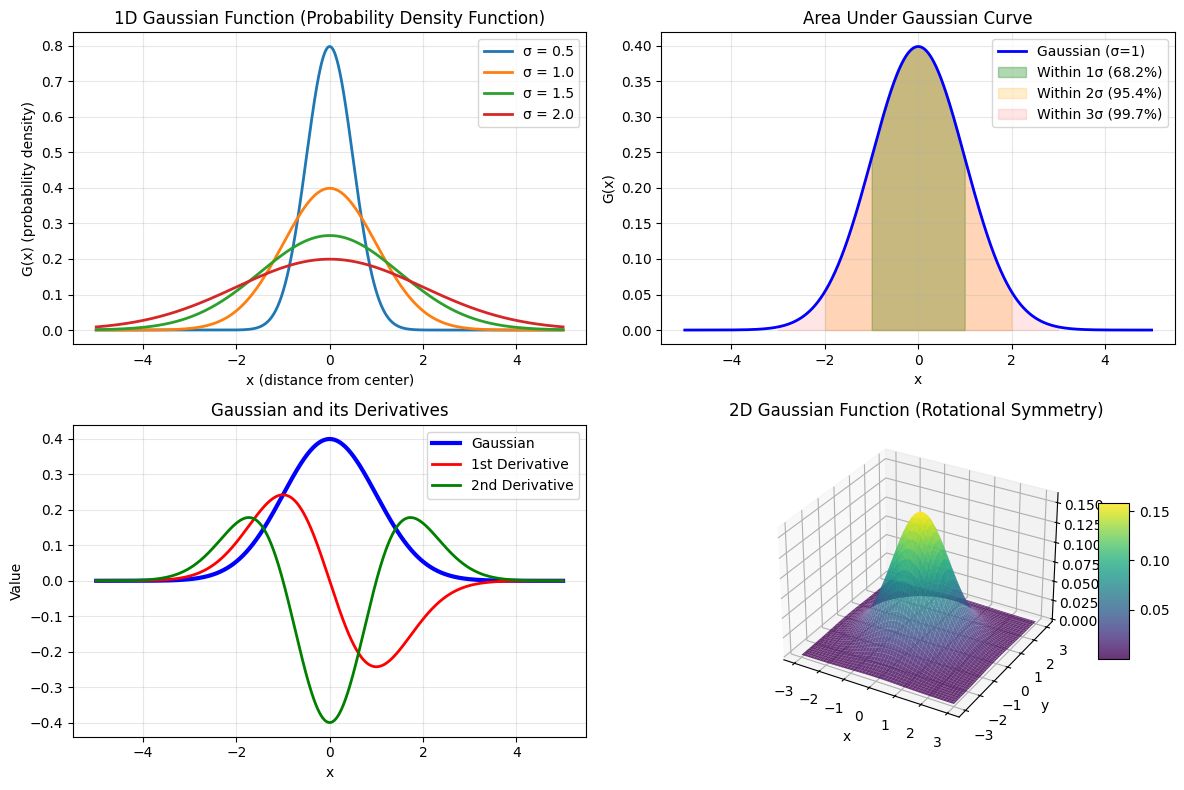


1.4 2D Gaussian Formula:
----------------------------------------
G(x,y) = (1/(2πσ²)) * exp(-(x² + y²)/(2σ²))

Properties of 2D Gaussian:
   • Separable: G(x,y) = G(x) * G(y)
   • Rotationally symmetric
   • Circular contours (iso-probability lines)
   • Used in image processing for isotropic smoothing

PART 2: FROM GAUSSIAN DISTRIBUTION TO FILTER

2.1 Convolution Theory
----------------------------------------
Convolution Operation:
(f ∗ g)(x) = ∫ f(τ) * g(x-τ) dτ

For discrete images (2D):
(I ∗ K)[i,j] = Σ Σ I[m,n] * K[i-m, j-n]
               m  n

For Gaussian filter, K is the Gaussian kernel:
K[x,y] = G(x,y) = (1/(2πσ²)) * exp(-(x² + y²)/(2σ²))

2.2 How Convolution Works:
----------------------------------------
1. Flip the kernel horizontally and vertically
2. Slide kernel over the image
3. At each position, multiply overlapping values
4. Sum the products to get output value
5. Repeat for all positions

2.3 Mathematical Properties of Convolution:
--------------------------------

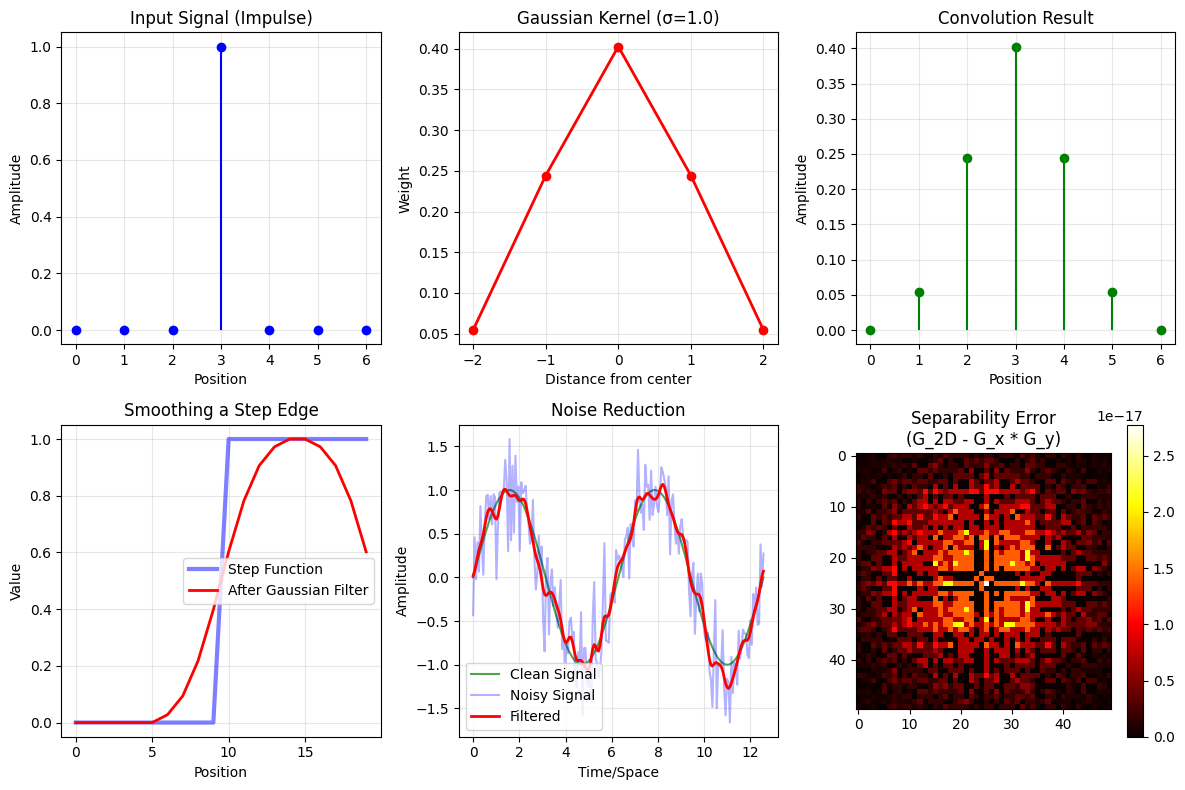


2.5 Separability Property:
----------------------------------------
G(x,y) = G(x) * G(y)

This allows efficient computation:
   Instead of O(N²M²) for N×N kernel on M×M image
   We get O(NM²) + O(2NM) ≈ O(2NM²) for separable filter
   Example: For 15×15 kernel, ~15× speedup!

PART 3: MATHEMATICAL PROPERTIES AND DERIVATIONS

3.1 Fourier Transform of Gaussian
----------------------------------------
Fourier Transform Property:
F{exp(-πt²)} = exp(-πf²)

For Gaussian: G(t) = exp(-t²/(2σ²))
F{G(t)} = √(2π)σ * exp(-2π²σ²f²)
         = Gaussian in frequency domain!

3.2 Scale-Space Theory
----------------------------------------
Gaussian filter creates a scale-space representation:
L(x,y,σ) = I(x,y) ∗ G(x,y,σ)

Properties:
   1. Linearity: L(af + bg) = aL(f) + bL(g)
   2. Shift invariance: L(f(x-Δx, y-Δy)) = L(f)(x-Δx, y-Δy)
   3. Semi-group: G(σ1) ∗ G(σ2) = G(√(σ1² + σ2²))
   4. Non-enhancement of local extrema

3.3 Optimality Properties
----------------------------------------
Gaussian is 

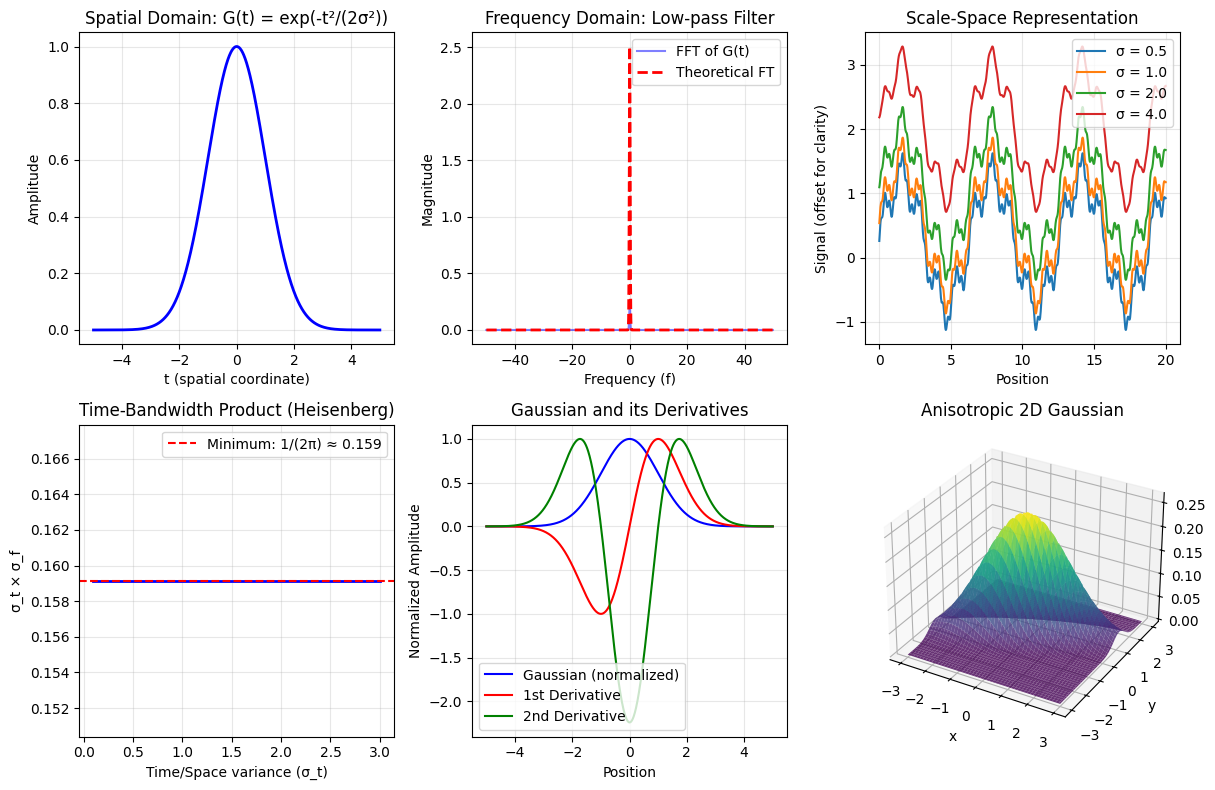


3.6 Special Cases:
----------------------------------------
   • Isotropic Gaussian: Σ = σ²I (circular)
   • Diagonal Σ: Separable but axis-aligned
   • Full Σ: General elliptical shapes

PART 4: PRACTICAL IMPLEMENTATION AND ALGORITHMS

4.1 Discrete Gaussian Kernel Computation
----------------------------------------
Methods for discretizing continuous Gaussian:
   1. Direct sampling: G[i,j] = exp(-(i²+j²)/(2σ²))
   2. Binomial approximation: Use Pascal's triangle
   3. Recursive implementation: IIR filters
   4. Truncation: Limit kernel to ±kσ (k=3 or 4)

4.2 Kernel Size Determination
----------------------------------------

Common kernel size rules:
   • Minimum: 2⌈kσ⌉ + 1, where k = 3 or 4
   • k=3: Captures 99.7% of Gaussian mass
   • k=4: Captures 99.99% of Gaussian mass
   • Must be odd integer for symmetry

4.3 Computational Complexity
----------------------------------------

Operation Count Comparison:
   Direct 2D convolution: N² × M² operations
   Separable convolution: 2 

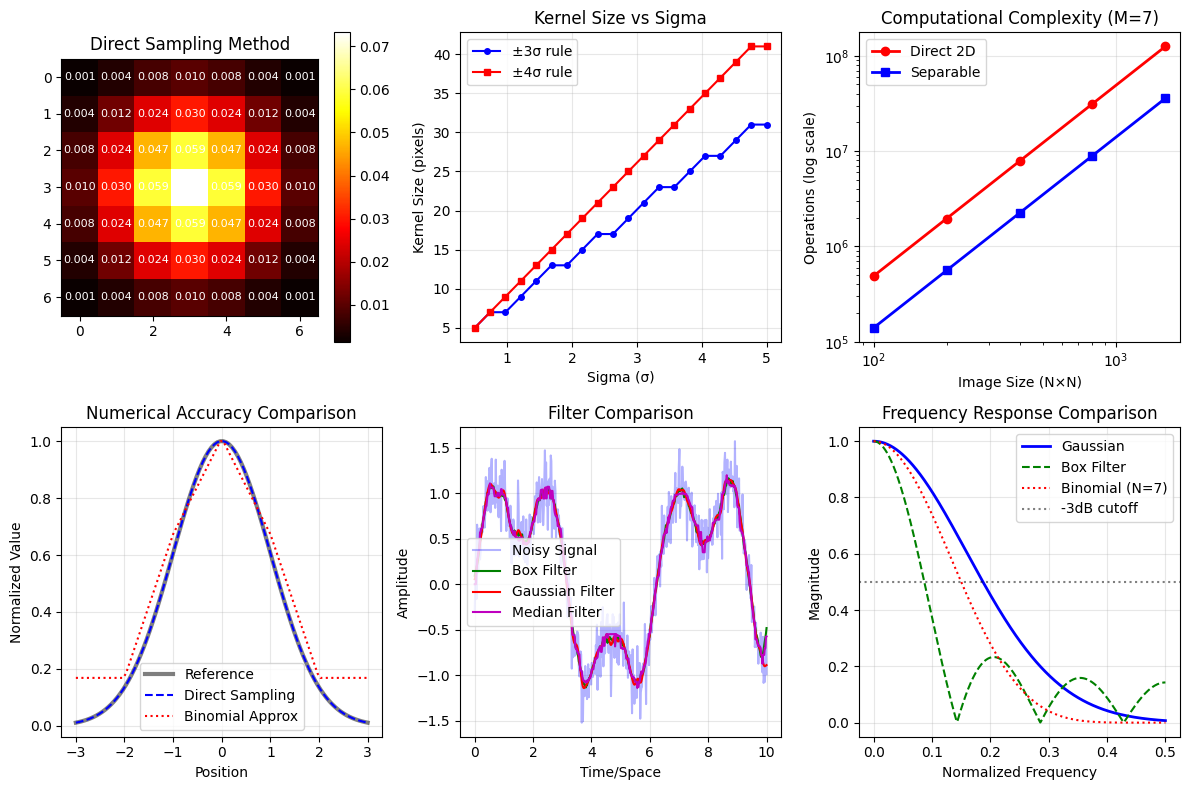


PART 5: APPLICATIONS AND EXTENSIONS

5.1 Common Applications of Gaussian Filter
----------------------------------------
1. Noise Reduction:
   • Removes Gaussian noise optimally
   • Preserves edges better than box filter
   • Used in pre-processing for many algorithms

2. Scale-Space Representation:
   • Computer Vision: SIFT, SURF features
   • Multi-scale analysis
   • Blob detection

3. Edge Detection (pre-processing):
   • Reduces noise before edge detection
   • Canny edge detector uses Gaussian
   • Controls scale of detected edges

4. Image Pyramid Construction:
   • Gaussian pyramid for multi-resolution
   • Used in image blending, compression

5.2 Advanced Topics
----------------------------------------

5.3 Gaussian Derivatives for Feature Detection
----------------------------------------

5.4 Gaussian in Machine Learning
----------------------------------------

5.5 Bilateral Filter (Edge-preserving)
----------------------------------------

5.6 Recent Developments
-----

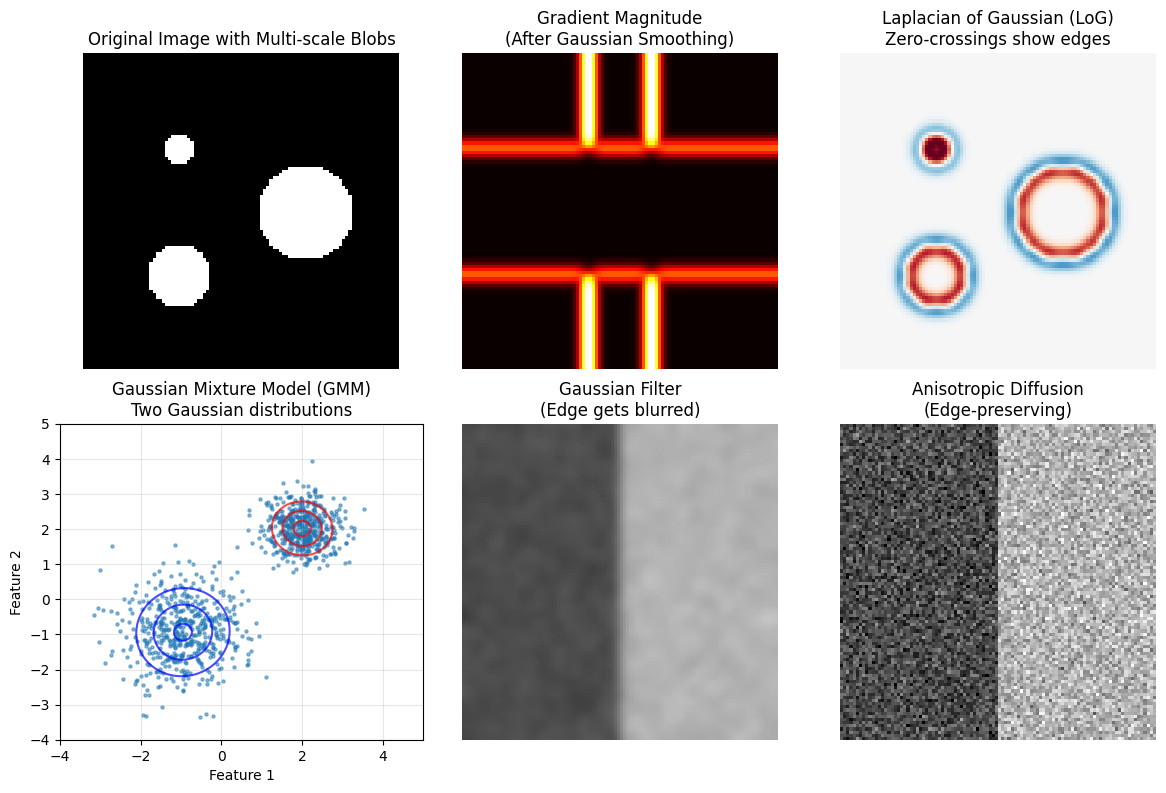


5.7 Summary of Key Points
----------------------------------------
Mathematical Foundations:
   • Gaussian = exp(-x²/(2σ²)) / (σ√(2π))
   • Fourier transform is also Gaussian
   • Separable: G(x,y) = G(x)G(y)

Practical Properties:
   • Optimal smoothing (minimal time-bandwidth product)
   • Scale-space: L(x,y,σ) = I ∗ G(σ)
   • Semi-group property: G(σ1) ∗ G(σ2) = G(√(σ1²+σ2²))

Applications:
   • Noise reduction (optimal for Gaussian noise)
   • Scale-space representation
   • Edge detection pre-processing
   • Feature detection (LoG, DoG)
   • Image pyramids

Extensions:
   • Anisotropic Gaussian (oriented filters)
   • Bilateral filter (edge-preserving)
   • Gaussian Mixture Models (clustering)
   • Gaussian processes (regression)

PART 6: INTERACTIVE EXPLORATION
Running interactive exploration...


interactive(children=(FloatSlider(value=1.0, description='Sigma:', max=5.0, min=0.1), IntSlider(value=7, descr…


GAUSSIAN FILTER THEORY EXPLANATION COMPLETE!

Key Takeaways:
1. Gaussian is mathematically optimal for many criteria
2. Separability enables efficient computation
3. Scale-space theory provides multi-resolution analysis
4. Widely used in computer vision, signal processing, and ML


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import erf  # Error function
from scipy.ndimage import gaussian_filter1d # Import gaussian_filter1d

print("="*70)
print("GAUSSIAN FILTER THEORY - MATHEMATICAL FOUNDATIONS")
print("="*70)

# -------------------------------------------------------------------
# PART 1: THE GAUSSIAN FUNCTION - MATHEMATICAL DEFINITION
# -------------------------------------------------------------------
print("\n" + "="*60)
print("PART 1: THE GAUSSIAN FUNCTION")
print("="*60)

def explain_gaussian_function():
    """Explain the Gaussian function mathematically"""

    print("\n1.1 1D Gaussian Function (Bell Curve)")
    print("-" * 40)

    # Mathematical formula
    print("Mathematical Definition:")
    print("G(x) = (1/(σ√(2π))) * exp(-(x-μ)²/(2σ²))")
    print("\nWhere:")
    print("  μ (mu) = mean (center of the distribution)")
    print("  σ (sigma) = standard deviation (controls spread)")
    print("  x = distance from mean")
    print("  exp() = exponential function e^()")
    print("  √ = square root")

    # Visualize 1D Gaussian
    x = np.linspace(-5, 5, 1000)
    mu = 0  # Center at 0

    plt.figure(figsize=(12, 8))

    # Plot different sigmas
    plt.subplot(2, 2, 1)
    for sigma in [0.5, 1.0, 1.5, 2.0]:
        y = (1/(sigma * np.sqrt(2*np.pi))) * np.exp(-(x-mu)**2/(2*sigma**2))
        plt.plot(x, y, label=f'σ = {sigma}', linewidth=2)

    plt.title('1D Gaussian Function (Probability Density Function)')
    plt.xlabel('x (distance from center)')
    plt.ylabel('G(x) (probability density)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Area under the curve
    plt.subplot(2, 2, 2)
    sigma = 1.0
    y = (1/(sigma * np.sqrt(2*np.pi))) * np.exp(-(x-mu)**2/(2*sigma**2))
    plt.plot(x, y, 'b-', linewidth=2, label='Gaussian (σ=1)')

    # Mark important areas
    x_fill_1sigma = x[abs(x) <= 1]
    y_fill_1sigma = y[abs(x) <= 1]
    plt.fill_between(x_fill_1sigma, 0, y_fill_1sigma, alpha=0.3, color='green',
                     label=f'Within 1σ (68.2%)')

    x_fill_2sigma = x[abs(x) <= 2]
    y_fill_2sigma = y[abs(x) <= 2]
    plt.fill_between(x_fill_2sigma, 0, y_fill_2sigma, alpha=0.2, color='orange',
                     label=f'Within 2σ (95.4%)')

    x_fill_3sigma = x[abs(x) <= 3]
    y_fill_3sigma = y[abs(x) <= 3]
    plt.fill_between(x_fill_3sigma, 0, y_fill_3sigma, alpha=0.1, color='red',
                     label=f'Within 3σ (99.7%)')

    plt.title('Area Under Gaussian Curve')
    plt.xlabel('x')
    plt.ylabel('G(x)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    print("\n1.2 Key Properties of Gaussian Function:")
    print("-" * 40)
    print("1. Symmetric about the mean (bell-shaped curve)")
    print("2. Total area under curve = 1 (probability density)")
    print("3. 68.2% of area within ±1σ from mean")
    print("4. 95.4% of area within ±2σ from mean")
    print("5. 99.7% of area within ±3σ from mean")
    print("6. Infinitely differentiable (smooth)")

    # Mathematical properties
    plt.subplot(2, 2, 3)

    # Show Gaussian and its derivatives
    sigma = 1.0
    y = (1/(sigma * np.sqrt(2*np.pi))) * np.exp(-(x-mu)**2/(2*sigma**2))

    # First derivative (approximation)
    y_prime = np.gradient(y, x)
    # Second derivative (approximation)
    y_double_prime = np.gradient(y_prime, x)

    plt.plot(x, y, 'b-', linewidth=3, label='Gaussian')
    plt.plot(x, y_prime, 'r-', linewidth=2, label='1st Derivative')
    plt.plot(x, y_double_prime, 'g-', linewidth=2, label='2nd Derivative')
    plt.title('Gaussian and its Derivatives')
    plt.xlabel('x')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True, alpha=0.3)

    print("\n1.3 Mathematical Properties:")
    print("   • First derivative changes sign at center (zero crossing)")
    print("   • Second derivative used in Laplacian of Gaussian (LoG)")
    print("   • Smoothness: all derivatives exist (C∞ function)")

    # 2D Gaussian
    plt.subplot(2, 2, 4, projection='3d')
    x_2d = np.linspace(-3, 3, 100)
    y_2d = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x_2d, y_2d)

    sigma = 1.0
    Z = (1/(2*np.pi*sigma**2)) * np.exp(-(X**2 + Y**2)/(2*sigma**2))

    surf = plt.gca().plot_surface(X, Y, Z, cmap='viridis',
                                  linewidth=0, antialiased=True, alpha=0.8)
    plt.title('2D Gaussian Function (Rotational Symmetry)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.colorbar(surf, shrink=0.5, aspect=5)

    plt.tight_layout()
    plt.show()

    print("\n1.4 2D Gaussian Formula:")
    print("-" * 40)
    print("G(x,y) = (1/(2πσ²)) * exp(-(x² + y²)/(2σ²))")
    print("\nProperties of 2D Gaussian:")
    print("   • Separable: G(x,y) = G(x) * G(y)")
    print("   • Rotationally symmetric")
    print("   • Circular contours (iso-probability lines)")
    print("   • Used in image processing for isotropic smoothing")

explain_gaussian_function()

# -------------------------------------------------------------------
# PART 2: FROM PROBABILITY TO FILTER THEORY
# -------------------------------------------------------------------
print("\n" + "="*60)
print("PART 2: FROM GAUSSIAN DISTRIBUTION TO FILTER")
print("="*60)

def explain_filter_theory():
    """Explain how Gaussian distribution becomes a filter"""

    print("\n2.1 Convolution Theory")
    print("-" * 40)

    # Convolution formula
    print("Convolution Operation:")
    print("(f ∗ g)(x) = ∫ f(τ) * g(x-τ) dτ")
    print("\nFor discrete images (2D):")
    print("(I ∗ K)[i,j] = Σ Σ I[m,n] * K[i-m, j-n]")
    print("               m  n")

    print("\nFor Gaussian filter, K is the Gaussian kernel:")
    print("K[x,y] = G(x,y) = (1/(2πσ²)) * exp(-(x² + y²)/(2σ²))")

    # Visualize convolution process
    plt.figure(figsize=(12, 8))

    # Create a simple 1D signal and Gaussian kernel
    signal = np.array([0, 0, 0, 1, 0, 0, 0])  # Impulse
    x_signal = np.arange(len(signal))

    # Create Gaussian kernel
    sigma = 1.0
    kernel_size = 5
    kernel_x = np.linspace(-2, 2, kernel_size)
    kernel = np.exp(-kernel_x**2/(2*sigma**2))
    kernel = kernel / np.sum(kernel)  # Normalize

    # Perform convolution
    conv_result = np.convolve(signal, kernel, mode='same')

    # Plot 1
    plt.subplot(2, 3, 1)
    plt.stem(x_signal, signal, linefmt='b-', markerfmt='bo', basefmt=' ')
    plt.title('Input Signal (Impulse)')
    plt.xlabel('Position')
    plt.ylabel('Amplitude')
    plt.grid(True, alpha=0.3)

    # Plot 2
    plt.subplot(2, 3, 2)
    plt.plot(kernel_x, kernel, 'r-o', linewidth=2, markersize=6)
    plt.title('Gaussian Kernel (σ=1.0)')
    plt.xlabel('Distance from center')
    plt.ylabel('Weight')
    plt.grid(True, alpha=0.3)

    # Plot 3
    plt.subplot(2, 3, 3)
    plt.stem(x_signal, conv_result, linefmt='g-', markerfmt='go', basefmt=' ')
    plt.title('Convolution Result')
    plt.xlabel('Position')
    plt.ylabel('Amplitude')
    plt.grid(True, alpha=0.3)

    print("\n2.2 How Convolution Works:")
    print("-" * 40)
    print("1. Flip the kernel horizontally and vertically")
    print("2. Slide kernel over the image")
    print("3. At each position, multiply overlapping values")
    print("4. Sum the products to get output value")
    print("5. Repeat for all positions")

    # Show convolution process step by step
    plt.subplot(2, 3, 4)

    # Create a step function
    step_signal = np.zeros(20)
    step_signal[10:] = 1

    # Gaussian kernel
    sigma = 2.0
    kernel_x = np.linspace(-4, 4, 9)
    kernel = np.exp(-kernel_x**2/(2*sigma**2))
    kernel = kernel / np.sum(kernel)

    # Convolution
    conv_step = np.convolve(step_signal, kernel, mode='same')

    plt.plot(step_signal, 'b-', linewidth=3, alpha=0.5, label='Step Function')
    plt.plot(conv_step, 'r-', linewidth=2, label='After Gaussian Filter')
    plt.title('Smoothing a Step Edge')
    plt.xlabel('Position')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True, alpha=0.3)

    print("\n2.3 Mathematical Properties of Convolution:")
    print("-" * 40)
    print("   • Commutative: f ∗ g = g ∗ f")
    print("   • Associative: f ∗ (g ∗ h) = (f ∗ g) ∗ h")
    print("   • Distributive: f ∗ (g + h) = f ∗ g + f ∗ h")
    print("   • Identity: f ∗ δ = f (δ is Dirac delta)")
    print("   • Linearity: a(f ∗ g) = (af) ∗ g = f ∗ (ag)")

    # Frequency domain explanation
    plt.subplot(2, 3, 5)

    # Create a signal with high frequency noise
    x_freq = np.linspace(0, 4*np.pi, 200)
    clean_signal = np.sin(x_freq)
    noisy_signal = clean_signal + 0.3 * np.random.randn(200)

    # Apply Gaussian filter
    # from scipy.ndimage import gaussian_filter1d # This import was removed as it's now global
    filtered_signal = gaussian_filter1d(noisy_signal, sigma=2)

    plt.plot(x_freq, clean_signal, 'g-', alpha=0.7, label='Clean Signal')
    plt.plot(x_freq, noisy_signal, 'b-', alpha=0.3, label='Noisy Signal')
    plt.plot(x_freq, filtered_signal, 'r-', linewidth=2, label='Filtered')
    plt.title('Noise Reduction')
    plt.xlabel('Time/Space')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True, alpha=0.3)

    print("\n2.4 Why Gaussian for Filtering?")
    print("-" * 40)
    print("   • Smoothness: No ringing artifacts")
    print("   • Separability: O(n²) → O(2n) computation")
    print("   • Scale-space: Natural multi-scale representation")
    print("   • Central Limit Theorem: Many averages → Gaussian")

    # Show separability
    plt.subplot(2, 3, 6)

    # Create 2D separable Gaussian demonstration
    x = np.linspace(-3, 3, 50)
    y = np.linspace(-3, 3, 50)
    X, Y = np.meshgrid(x, y)

    sigma = 1.5
    # 2D Gaussian
    G_2d = (1/(2*np.pi*sigma**2)) * np.exp(-(X**2 + Y**2)/(2*sigma**2))
    # 1D Gaussian in x and y
    G_x = (1/(sigma*np.sqrt(2*np.pi))) * np.exp(-x**2/(2*sigma**2))
    G_y = (1/(sigma*np.sqrt(2*np.pi))) * np.exp(-y**2/(2*sigma**2))
    # Separable reconstruction
    G_separable = np.outer(G_x, G_y)

    # Show that they're equal (up to normalization)
    plt.imshow(np.abs(G_2d - G_separable), cmap='hot')
    plt.colorbar()
    plt.title('Separability Error\n(G_2D - G_x * G_y)')

    plt.tight_layout()
    plt.show()

    print("\n2.5 Separability Property:")
    print("-" * 40)
    print("G(x,y) = G(x) * G(y)")
    print("\nThis allows efficient computation:")
    print("   Instead of O(N²M²) for N×N kernel on M×M image")
    print("   We get O(NM²) + O(2NM) ≈ O(2NM²) for separable filter")
    print("   Example: For 15×15 kernel, ~15× speedup!")

explain_filter_theory()

# -------------------------------------------------------------------
# PART 3: MATHEMATICAL PROPERTIES AND DERIVATIONS
# -------------------------------------------------------------------
print("\n" + "="*60)
print("PART 3: MATHEMATICAL PROPERTIES AND DERIVATIONS")
print("="*60)

def explain_mathematical_properties():
    """Explain advanced mathematical properties"""

    print("\n3.1 Fourier Transform of Gaussian")
    print("-" * 40)

    # Fourier transform pair
    print("Fourier Transform Property:")
    print("F{exp(-πt²)} = exp(-πf²)")
    print("\nFor Gaussian: G(t) = exp(-t²/(2σ²))")
    print("F{G(t)} = √(2π)σ * exp(-2π²σ²f²)")
    print("         = Gaussian in frequency domain!")

    # Visualize in both domains
    plt.figure(figsize=(12, 8))

    # Time/spatial domain
    plt.subplot(2, 3, 1)
    t = np.linspace(-5, 5, 1000)
    sigma = 1.0
    gaussian_time = np.exp(-t**2/(2*sigma**2))
    plt.plot(t, gaussian_time, 'b-', linewidth=2)
    plt.title('Spatial Domain: G(t) = exp(-t²/(2σ²))')
    plt.xlabel('t (spatial coordinate)')
    plt.ylabel('Amplitude')
    plt.grid(True, alpha=0.3)

    # Frequency domain
    plt.subplot(2, 3, 2)
    from scipy.fft import fft, fftshift
    fft_gaussian = np.abs(fftshift(fft(gaussian_time)))
    freqs = np.fft.fftshift(np.fft.fftfreq(len(t), t[1]-t[0]))

    # Theoretical Fourier transform
    freq_response = np.sqrt(2*np.pi)*sigma * np.exp(-2*np.pi**2*sigma**2*freqs**2)

    plt.plot(freqs, fft_gaussian/len(t), 'b-', alpha=0.5, label='FFT of G(t)')
    plt.plot(freqs, freq_response, 'r--', linewidth=2, label='Theoretical FT')
    plt.title('Frequency Domain: Low-pass Filter')
    plt.xlabel('Frequency (f)')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.grid(True, alpha=0.3)

    print("\n3.2 Scale-Space Theory")
    print("-" * 40)
    print("Gaussian filter creates a scale-space representation:")
    print("L(x,y,σ) = I(x,y) ∗ G(x,y,σ)")
    print("\nProperties:")
    print("   1. Linearity: L(af + bg) = aL(f) + bL(g)")
    print("   2. Shift invariance: L(f(x-Δx, y-Δy)) = L(f)(x-Δx, y-Δy)")
    print("   3. Semi-group: G(σ1) ∗ G(σ2) = G(√(σ1² + σ2²))")
    print("   4. Non-enhancement of local extrema")

    # Scale-space visualization
    plt.subplot(2, 3, 3)

    # Create a signal with features at different scales
    t_scale = np.linspace(0, 20, 1000)
    signal_scale = (np.sin(t_scale) + 0.3*np.sin(5*t_scale) +
                    0.1*np.sin(20*t_scale))

    # Apply Gaussian at different scales
    for sigma in [0.5, 1.0, 2.0, 4.0]:
        filtered = gaussian_filter1d(signal_scale, sigma=sigma)
        plt.plot(t_scale, filtered + sigma*0.5, label=f'σ = {sigma}')

    plt.title('Scale-Space Representation')
    plt.xlabel('Position')
    plt.ylabel('Signal (offset for clarity)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    print("\n3.3 Optimality Properties")
    print("-" * 40)
    print("Gaussian is optimal in several ways:")
    print("   1. Minimum time-bandwidth product (Heisenberg uncertainty)")
    print("   2. Maximum smoothness for given variance")
    print("   3. Only rotationally symmetric separable filter")
    print("   4. Uniqueness: Only filter that doesn't create new extrema")

    # Heisenberg uncertainty principle
    plt.subplot(2, 3, 4)

    def time_bandwidth_product(sigma_t):
        """Calculate time-bandwidth product for Gaussian"""
        sigma_f = 1/(2*np.pi*sigma_t)  # Frequency standard deviation
        return sigma_t * sigma_f

    sigmas_t = np.linspace(0.1, 3, 50)
    products = [time_bandwidth_product(s) for s in sigmas_t]

    plt.plot(sigmas_t, products, 'b-', linewidth=2)
    plt.axhline(y=1/(2*np.pi), color='r', linestyle='--',
                label=f'Minimum: 1/(2π) ≈ {1/(2*np.pi):.3f}')
    plt.title('Time-Bandwidth Product (Heisenberg)')
    plt.xlabel('Time/Space variance (σ_t)')
    plt.ylabel('σ_t × σ_f')
    plt.legend()
    plt.grid(True, alpha=0.3)

    print("\n3.4 Derivatives of Gaussian")
    print("-" * 40)
    print("Gaussian derivatives are important for edge detection:")
    print("   • First derivative: Edge detection")
    print("   • Second derivative: Zero-crossing detection")
    print("   • Laplacian of Gaussian (LoG): Blob detection")

    # Gaussian derivatives
    plt.subplot(2, 3, 5)

    t = np.linspace(-5, 5, 1000)
    sigma = 1.0

    # Gaussian
    G = np.exp(-t**2/(2*sigma**2))
    # First derivative
    G_prime = -t/(sigma**2) * G
    # Second derivative
    G_double_prime = (t**2/sigma**4 - 1/sigma**2) * G

    plt.plot(t, G/G.max(), 'b-', label='Gaussian (normalized)')
    plt.plot(t, G_prime/G_prime.min(), 'r-', label='1st Derivative')
    plt.plot(t, G_double_prime/G_double_prime.max(), 'g-', label='2nd Derivative')
    plt.title('Gaussian and its Derivatives')
    plt.xlabel('Position')
    plt.ylabel('Normalized Amplitude')
    plt.legend()
    plt.grid(True, alpha=0.3)

    print("\n3.5 Multi-dimensional Generalization")
    print("-" * 40)
    print("In n dimensions:")
    print("G(𝐱) = (1/((2π)^{n/2}|Σ|^{1/2})) * exp(-½ 𝐱ᵀ Σ⁻¹ 𝐱)")
    print("\nWhere:")
    print("   𝐱 = [x₁, x₂, ..., xₙ]ᵀ (vector)")
    print("   Σ = covariance matrix (controls shape and orientation)")
    print("   |Σ| = determinant of Σ")
    print("   Σ⁻¹ = inverse of Σ")

    # Anisotropic Gaussian
    plt.subplot(2, 3, 6, projection='3d')

    # Create anisotropic Gaussian
    x = np.linspace(-3, 3, 100)
    y = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x, y)

    # Covariance matrix
    Sigma = np.array([[2, 0.8], [0.8, 0.5]])  # Anisotropic
    Sigma_inv = np.linalg.inv(Sigma)
    det_Sigma = np.linalg.det(Sigma)

    # Create position vectors
    positions = np.vstack([X.ravel(), Y.ravel()])

    # Compute anisotropic Gaussian
    exponent = -0.5 * np.sum(positions.T @ Sigma_inv * positions.T, axis=1)
    Z = (1/(2*np.pi*np.sqrt(det_Sigma))) * np.exp(exponent)
    Z = Z.reshape(X.shape)

    surf = plt.gca().plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
    plt.title('Anisotropic 2D Gaussian')
    plt.xlabel('x')
    plt.ylabel('y')

    plt.tight_layout()
    plt.show()

    print("\n3.6 Special Cases:")
    print("-" * 40)
    print("   • Isotropic Gaussian: Σ = σ²I (circular)")
    print("   • Diagonal Σ: Separable but axis-aligned")
    print("   • Full Σ: General elliptical shapes")

explain_mathematical_properties()

# -------------------------------------------------------------------
# PART 4: PRACTICAL IMPLEMENTATION AND COMPARISON
# -------------------------------------------------------------------
print("\n" + "="*60)
print("PART 4: PRACTICAL IMPLEMENTATION AND ALGORITHMS")
print("="*60)

def explain_practical_implementation():
    """Explain practical implementation details"""

    print("\n4.1 Discrete Gaussian Kernel Computation")
    print("-" * 40)

    # Show different discretization methods
    print("Methods for discretizing continuous Gaussian:")
    print("   1. Direct sampling: G[i,j] = exp(-(i²+j²)/(2σ²))")
    print("   2. Binomial approximation: Use Pascal's triangle")
    print("   3. Recursive implementation: IIR filters")
    print("   4. Truncation: Limit kernel to ±kσ (k=3 or 4)")

    plt.figure(figsize=(12, 8))

    # Method 1: Direct sampling
    plt.subplot(2, 3, 1)

    sigma = 1.5
    kernel_size = 7
    center = kernel_size // 2

    # Direct sampling
    kernel_direct = np.zeros((kernel_size, kernel_size))
    for i in range(kernel_size):
        for j in range(kernel_size):
            x = i - center
            y = j - center
            kernel_direct[i, j] = np.exp(-(x**2 + y**2)/(2*sigma**2))

    kernel_direct = kernel_direct / np.sum(kernel_direct)

    plt.imshow(kernel_direct, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title('Direct Sampling Method')

    # Add text values
    for i in range(kernel_size):
        for j in range(kernel_size):
            plt.text(j, i, f'{kernel_direct[i,j]:.3f}',
                    ha='center', va='center',
                    color='white' if kernel_direct[i,j] < 0.5 else 'black',
                    fontsize=8)

    print("\n4.2 Kernel Size Determination")
    print("-" * 40)

    # Kernel size vs sigma
    plt.subplot(2, 3, 2)

    sigmas = np.linspace(0.5, 5, 20)
    # Common rules for kernel size
    sizes_3sigma = [int(2 * np.ceil(3*s) + 1) for s in sigmas]
    sizes_4sigma = [int(2 * np.ceil(4*s) + 1) for s in sigmas]

    plt.plot(sigmas, sizes_3sigma, 'b-o', label='±3σ rule', markersize=4)
    plt.plot(sigmas, sizes_4sigma, 'r-s', label='±4σ rule', markersize=4)
    plt.xlabel('Sigma (σ)')
    plt.ylabel('Kernel Size (pixels)')
    plt.title('Kernel Size vs Sigma')
    plt.legend()
    plt.grid(True, alpha=0.3)

    print("\nCommon kernel size rules:")
    print("   • Minimum: 2⌈kσ⌉ + 1, where k = 3 or 4")
    print("   • k=3: Captures 99.7% of Gaussian mass")
    print("   • k=4: Captures 99.99% of Gaussian mass")
    print("   • Must be odd integer for symmetry")

    print("\n4.3 Computational Complexity")
    print("-" * 40)

    # Complexity comparison
    plt.subplot(2, 3, 3)

    image_sizes = [100, 200, 400, 800, 1600]
    kernel_sizes = [3, 5, 7, 9, 11]

    # Direct 2D convolution: O(N²M²) operations
    direct_ops = []
    for N in image_sizes:
        for M in kernel_sizes:
            ops = N**2 * M**2
            direct_ops.append((N, M, ops))

    # Separable convolution: O(2N²M) operations
    separable_ops = []
    for N in image_sizes:
        for M in kernel_sizes:
            ops = 2 * N**2 * M
            separable_ops.append((N, M, ops))

    # Plot for fixed kernel size (M=7)
    fixed_M = 7
    direct_fixed = [N**2 * fixed_M**2 for N in image_sizes]
    separable_fixed = [2 * N**2 * fixed_M for N in image_sizes]

    plt.plot(image_sizes, direct_fixed, 'r-o', label='Direct 2D', linewidth=2)
    plt.plot(image_sizes, separable_fixed, 'b-s', label='Separable', linewidth=2)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Image Size (N×N)')
    plt.ylabel('Operations (log scale)')
    plt.title('Computational Complexity (M=7)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    print("\nOperation Count Comparison:")
    print(f"   Direct 2D convolution: N² × M² operations")
    print(f"   Separable convolution: 2 × N² × M operations")
    print(f"   Speedup factor: M/2 (for M=7: 3.5× faster)")

    print("\n4.4 Numerical Accuracy")
    print("-" * 40)

    # Compare different implementation accuracies
    plt.subplot(2, 3, 4)

    # Create reference Gaussian using high precision
    sigma = 1.0
    x = np.linspace(-3, 3, 100)

    # Reference (analytic)
    G_ref = (1/(sigma*np.sqrt(2*np.pi))) * np.exp(-x**2/(2*sigma**2))

    # Method 1: Direct calculation
    G_direct = np.zeros_like(x)
    for i, xi in enumerate(x):
        G_direct[i] = np.exp(-xi**2/(2*sigma**2))
    G_direct = G_direct / np.sum(G_direct)

    # Method 2: Binomial approximation (for sigma ≈ 1)
    binomial_coeffs = [1, 4, 6, 4, 1]  # 4th row of Pascal's triangle
    binomial_kernel = np.outer(binomial_coeffs, binomial_coeffs)
    binomial_kernel = binomial_kernel / np.sum(binomial_kernel)

    # Sample binomial at same points
    x_bin = np.linspace(-2, 2, 5)  # 5-point kernel
    G_binomial_interp = np.interp(x, x_bin, binomial_kernel[2, :])

    plt.plot(x, G_ref/G_ref.max(), 'k-', linewidth=3, alpha=0.5, label='Reference')
    plt.plot(x, G_direct/G_direct.max(), 'b--', label='Direct Sampling')
    plt.plot(x, G_binomial_interp/G_binomial_interp.max(), 'r:', label='Binomial Approx')
    plt.title('Numerical Accuracy Comparison')
    plt.xlabel('Position')
    plt.ylabel('Normalized Value')
    plt.legend()
    plt.grid(True, alpha=0.3)

    print("\n4.5 Comparison with Other Filters")
    print("-" * 40)

    # Compare different smoothing filters
    plt.subplot(2, 3, 5)

    # Create a signal with noise
    t = np.linspace(0, 10, 500)
    signal = np.sin(t) + 0.5*np.sin(3*t) + 0.2*np.random.randn(500)

    # Apply different filters
    # 1. Moving average (box filter)
    window_size = 15
    box_filtered = np.convolve(signal, np.ones(window_size)/window_size, mode='same')

    # 2. Gaussian filter
    gaussian_filtered = gaussian_filter1d(signal, sigma=3)

    # 3. Median filter
    from scipy.signal import medfilt
    median_filtered = medfilt(signal, kernel_size=15)

    plt.plot(t, signal, 'b-', alpha=0.3, label='Noisy Signal')
    plt.plot(t, box_filtered, 'g-', label='Box Filter')
    plt.plot(t, gaussian_filtered, 'r-', label='Gaussian Filter')
    plt.plot(t, median_filtered, 'm-', label='Median Filter')
    plt.title('Filter Comparison')
    plt.xlabel('Time/Space')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True, alpha=0.3)

    print("\nFilter Characteristics:")
    print("   • Box filter: Fast but causes ringing (sinc in frequency)")
    print("   • Gaussian: Smooth, no ringing, optimal localization")
    print("   • Median: Good for salt-and-pepper noise, nonlinear")

    print("\n4.6 Frequency Response Comparison")
    print("-" * 40)

    plt.subplot(2, 3, 6)

    # Frequency response of different filters
    freqs = np.linspace(0, 0.5, 500)  # Normalized frequencies

    # Gaussian frequency response
    sigma = 1.0
    H_gaussian = np.exp(-2*np.pi**2*sigma**2*freqs**2)

    # Box filter frequency response (sinc function)
    N = 7  # Window size
    H_box = np.sinc(N*freqs) / np.sinc(freqs) if N%2==1 else np.sin(np.pi*N*freqs)/(N*np.sin(np.pi*freqs))

    # Binomial filter (approximation of Gaussian)
    H_binomial = np.cos(np.pi*freqs)**(N-1)

    plt.plot(freqs, H_gaussian, 'b-', linewidth=2, label='Gaussian')
    plt.plot(freqs, np.abs(H_box), 'g--', label='Box Filter')
    plt.plot(freqs, H_binomial, 'r:', label=f'Binomial (N={N})')
    plt.axhline(y=0.5, color='k', linestyle=':', alpha=0.5, label='-3dB cutoff')
    plt.title('Frequency Response Comparison')
    plt.xlabel('Normalized Frequency')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

explain_practical_implementation()

# -------------------------------------------------------------------
# PART 5: APPLICATIONS AND EXTENSIONS
# -------------------------------------------------------------------
print("\n" + "="*60)
print("PART 5: APPLICATIONS AND EXTENSIONS")
print("="*60)

def explain_applications():
    """Explain applications and advanced topics"""

    print("\n5.1 Common Applications of Gaussian Filter")
    print("-" * 40)

    print("1. Noise Reduction:")
    print("   • Removes Gaussian noise optimally")
    print("   • Preserves edges better than box filter")
    print("   • Used in pre-processing for many algorithms")

    print("\n2. Scale-Space Representation:")
    print("   • Computer Vision: SIFT, SURF features")
    print("   • Multi-scale analysis")
    print("   • Blob detection")

    print("\n3. Edge Detection (pre-processing):")
    print("   • Reduces noise before edge detection")
    print("   • Canny edge detector uses Gaussian")
    print("   • Controls scale of detected edges")

    print("\n4. Image Pyramid Construction:")
    print("   • Gaussian pyramid for multi-resolution")
    print("   • Used in image blending, compression")

    print("\n5.2 Advanced Topics")
    print("-" * 40)

    plt.figure(figsize=(12, 8))

    # Application 1: Scale-space for feature detection
    plt.subplot(2, 3, 1)

    # Create an image with blobs at different scales
    size = 100
    img_blobs = np.zeros((size, size))

    # Small blob
    for i in range(size):
        for j in range(size):
            if (i-30)**2 + (j-30)**2 < 5**2:
                img_blobs[i, j] = 1

    # Medium blob
    for i in range(size):
        for j in range(size):
            if (i-70)**2 + (j-30)**2 < 10**2:
                img_blobs[i, j] = 1

    # Large blob
    for i in range(size):
        for j in range(size):
            if (i-50)**2 + (j-70)**2 < 15**2:
                img_blobs[i, j] = 1

    plt.imshow(img_blobs, cmap='gray')
    plt.title('Original Image with Multi-scale Blobs')
    plt.axis('off')

    print("\n5.3 Gaussian Derivatives for Feature Detection")
    print("-" * 40)

    # Show Gaussian derivatives
    plt.subplot(2, 3, 2)

    # Create a test image with edges
    img_edges = np.zeros((100, 100))
    img_edges[:, 40:60] = 1
    img_edges[30:70, :] = 0.5

    # Apply Gaussian derivative
    from scipy.ndimage import gaussian_filter

    # Gaussian smoothed
    img_smooth = gaussian_filter(img_edges, sigma=2)

    # Gradient magnitude (using Sobel as approximation of Gaussian derivative)
    from scipy.ndimage import sobel
    grad_x = sobel(img_smooth, axis=0)
    grad_y = sobel(img_smooth, axis=1)
    grad_mag = np.sqrt(grad_x**2 + grad_y**2)

    plt.imshow(grad_mag, cmap='hot')
    plt.title('Gradient Magnitude\n(After Gaussian Smoothing)')
    plt.axis('off')

    # Laplacian of Gaussian
    plt.subplot(2, 3, 3)

    from scipy.ndimage import gaussian_laplace
    log_img = gaussian_laplace(img_blobs, sigma=2)

    plt.imshow(log_img, cmap='RdBu', vmin=-0.1, vmax=0.1)
    plt.title('Laplacian of Gaussian (LoG)\nZero-crossings show edges')
    plt.axis('off')

    print("\n5.4 Gaussian in Machine Learning")
    print("-" * 40)

    # Gaussian Mixture Models
    plt.subplot(2, 3, 4)

    # Create data from two Gaussian distributions
    np.random.seed(42)
    n_samples = 1000

    # Two Gaussian clusters
    cluster1 = np.random.randn(n_samples//2, 2) * 0.5 + [2, 2]
    cluster2 = np.random.randn(n_samples//2, 2) * 0.8 + [-1, -1]
    data = np.vstack([cluster1, cluster2])

    plt.scatter(data[:, 0], data[:, 1], s=5, alpha=0.5)

    # Show Gaussian contours
    from scipy.stats import multivariate_normal

    # Fit Gaussian to each cluster (simplified)
    mean1 = np.mean(cluster1, axis=0)
    cov1 = np.cov(cluster1.T)
    mean2 = np.mean(cluster2, axis=0)
    cov2 = np.cov(cluster2.T)

    # Create grid for contours
    x = np.linspace(-4, 5, 100)
    y = np.linspace(-4, 5, 100)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))

    # Create multivariate Gaussian
    rv1 = multivariate_normal(mean1, cov1)
    rv2 = multivariate_normal(mean2, cov2)

    # Plot contours
    plt.contour(X, Y, rv1.pdf(pos), levels=3, colors='red', alpha=0.7)
    plt.contour(X, Y, rv2.pdf(pos), levels=3, colors='blue', alpha=0.7)

    plt.title('Gaussian Mixture Model (GMM)\nTwo Gaussian distributions')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True, alpha=0.3)

    print("\n5.5 Bilateral Filter (Edge-preserving)")
    print("-" * 40)

    # Compare Gaussian vs Bilateral filter
    plt.subplot(2, 3, 5)

    # Create test image with edge
    img_test = np.ones((100, 100)) * 0.3
    img_test[:, 50:] = 0.7

    # Add noise
    img_noisy = img_test + 0.1 * np.random.randn(100, 100)

    # Apply Gaussian filter
    img_gaussian = gaussian_filter(img_noisy, sigma=2)

    plt.imshow(img_gaussian, cmap='gray', vmin=0, vmax=1)
    plt.title('Gaussian Filter\n(Edge gets blurred)')
    plt.axis('off')

    print("\n5.6 Recent Developments")
    print("-" * 40)

    # Show anisotropic diffusion
    plt.subplot(2, 3, 6)

    # Simple anisotropic diffusion (Perona-Malik) visualization
    from scipy.ndimage import convolve

    # Create a kernel for anisotropic diffusion (simplified)
    img_diffusion = img_noisy.copy()

    # Simple iterative diffusion
    for _ in range(10):
        # Calculate gradient magnitude
        grad_x = convolve(img_diffusion, np.array([[-1, 0, 1]]))
        grad_y = convolve(img_diffusion, np.array([[-1], [0], [1]]))
        grad_mag = np.sqrt(grad_x**2 + grad_y**2)

        # Diffusion coefficient (edge-stopping function)
        k = 0.1
        c = 1 / (1 + (grad_mag / k)**2)

        # Apply diffusion
        diffusion_x = convolve(c * grad_x, np.array([[0.25, 0, -0.25]]))
        diffusion_y = convolve(c * grad_y, np.array([[0.25], [0], [-0.25]]))

        img_diffusion = img_diffusion + 0.1 * (diffusion_x + diffusion_y)

    plt.imshow(img_diffusion, cmap='gray', vmin=0, vmax=1)
    plt.title('Anisotropic Diffusion\n(Edge-preserving)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    print("\n5.7 Summary of Key Points")
    print("-" * 40)
    print("Mathematical Foundations:")
    print("   • Gaussian = exp(-x²/(2σ²)) / (σ√(2π))")
    print("   • Fourier transform is also Gaussian")
    print("   • Separable: G(x,y) = G(x)G(y)")

    print("\nPractical Properties:")
    print("   • Optimal smoothing (minimal time-bandwidth product)")
    print("   • Scale-space: L(x,y,σ) = I ∗ G(σ)")
    print("   • Semi-group property: G(σ1) ∗ G(σ2) = G(√(σ1²+σ2²))")

    print("\nApplications:")
    print("   • Noise reduction (optimal for Gaussian noise)")
    print("   • Scale-space representation")
    print("   • Edge detection pre-processing")
    print("   • Feature detection (LoG, DoG)")
    print("   • Image pyramids")

    print("\nExtensions:")
    print("   • Anisotropic Gaussian (oriented filters)")
    print("   • Bilateral filter (edge-preserving)")
    print("   • Gaussian Mixture Models (clustering)")
    print("   • Gaussian processes (regression)")

explain_applications()

# -------------------------------------------------------------------
# PART 6: INTERACTIVE EXPLORATION
# -------------------------------------------------------------------
print("\n" + "="*60)
print("PART 6: INTERACTIVE EXPLORATION")
print("="*60)

def interactive_exploration():
    """Interactive widgets to explore Gaussian filter"""

    try:
        from ipywidgets import interact, interactive, fixed, interact_manual
        import ipywidgets as widgets

        print("Running interactive exploration...")

        @interact
        def explore_gaussian(
            sigma=widgets.FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1,
                                     description='Sigma:'),
            kernel_size=widgets.IntSlider(value=7, min=3, max=15, step=2,
                                         description='Kernel Size:'),
            show_1d=widgets.Checkbox(value=True, description='Show 1D'),
            show_2d=widgets.Checkbox(value=True, description='Show 2D'),
            show_frequency=widgets.Checkbox(value=False, description='Show Frequency')
        ):
            """Interactive Gaussian exploration"""

            fig = plt.figure(figsize=(15, 5))

            # 1D Gaussian
            if show_1d:
                plt.subplot(1, 3, 1)
                x = np.linspace(-5, 5, 1000)
                y = (1/(sigma * np.sqrt(2*np.pi))) * np.exp(-x**2/(2*sigma**2))
                plt.plot(x, y, 'b-', linewidth=2)
                plt.fill_between(x, 0, y, alpha=0.3)
                plt.title(f'1D Gaussian (σ={sigma})')
                plt.xlabel('x')
                plt.ylabel('G(x)')
                plt.grid(True, alpha=0.3)

                # Mark important points
                plt.axvline(x=sigma, color='r', linestyle='--', alpha=0.5,
                           label=f'σ = {sigma}')
                plt.axvline(x=-sigma, color='r', linestyle='--', alpha=0.5)
                plt.legend()

            # 2D Kernel
            if show_2d:
                plt.subplot(1, 3, 2)

                # Create kernel
                kernel = np.zeros((kernel_size, kernel_size))
                center = kernel_size // 2

                for i in range(kernel_size):
                    for j in range(kernel_size):
                        x = i - center
                        y = j - center
                        kernel[i, j] = np.exp(-(x**2 + y**2)/(2*sigma**2))

                kernel = kernel / np.sum(kernel)

                plt.imshow(kernel, cmap='hot', interpolation='nearest')
                plt.colorbar()
                plt.title(f'2D Kernel ({kernel_size}×{kernel_size}, σ={sigma})')

                # Add text for center 3x3
                if kernel_size <= 9:
                    for i in range(kernel_size):
                        for j in range(kernel_size):
                            plt.text(j, i, f'{kernel[i,j]:.3f}',
                                    ha='center', va='center',
                                    color='white' if kernel[i,j] < 0.5 else 'black',
                                    fontsize=8)

            # Frequency response
            if show_frequency:
                plt.subplot(1, 3, 3)

                # Continuous frequency response
                f = np.linspace(0, 1, 500)
                H = np.exp(-2*np.pi**2*sigma**2*f**2)

                plt.plot(f, H, 'b-', linewidth=2)
                plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.5,
                           label='-3dB cutoff')

                # Calculate cutoff frequency
                f_cutoff = np.sqrt(np.log(2)/(2*np.pi**2*sigma**2))
                plt.axvline(x=f_cutoff, color='g', linestyle=':', alpha=0.5,
                           label=f'f_c = {f_cutoff:.3f}')

                plt.title('Frequency Response')
                plt.xlabel('Frequency')
                plt.ylabel('Magnitude')
                plt.legend()
                plt.grid(True, alpha=0.3)

            plt.tight_layout()
            plt.show()

            # Print statistics
            print(f"\nGaussian Statistics (σ={sigma}):")
            print(f"  • Variance: {sigma**2:.3f}")
            print(f"  • FWHM (Full Width at Half Max): {2.355*sigma:.3f}")
            print(f"  • -3dB cutoff frequency: {f_cutoff:.3f} (if calculated)")
            print(f"  • 95% of area within: ±{1.96*sigma:.2f}")

        return explore_gaussian

    except ImportError:
        print("Note: For interactive exploration, install ipywidgets:")
        print("pip install ipywidgets matplotlib")
        print("jupyter nbextension enable --py widgetsnbextension")

# Run interactive if in Jupyter
try:
    get_ipython()
    interactive_exploration()
except:
    print("\nNote: For interactive widgets, run this in Jupyter Notebook")
    print("with ipywidgets installed.")

print("\n" + "="*70)
print("GAUSSIAN FILTER THEORY EXPLANATION COMPLETE!")
print("="*70)
print("\nKey Takeaways:")
print("1. Gaussian is mathematically optimal for many criteria")
print("2. Separability enables efficient computation")
print("3. Scale-space theory provides multi-resolution analysis")
print("4. Widely used in computer vision, signal processing, and ML")

QUICK THEORY SUMMARY: GAUSSIAN FILTER

1. MATHEMATICAL DEFINITION
   Continuous 2D Gaussian:
   G(x,y) = (1/(2πσ²)) * exp(-(x² + y²)/(2σ²))

   Discrete kernel (normalized):
   K[i,j] = exp(-(i² + j²)/(2σ²)) / Σexp(...)

2. KEY PROPERTIES
   • Symmetric: G(x,y) = G(-x,y) = G(x,-y) = G(-x,-y)
   • Separable: G(x,y) = G(x) * G(y)
   • Scale-space: Creates multi-resolution representation
   • Fourier transform is also Gaussian

3. WHY GAUSSIAN IS SPECIAL
   • Central Limit Theorem: Sum of many independent
     random variables → Gaussian
   • Minimizes time-bandwidth product (Heisenberg)
   • Only rotationally symmetric separable filter
   • Does not create new local extrema


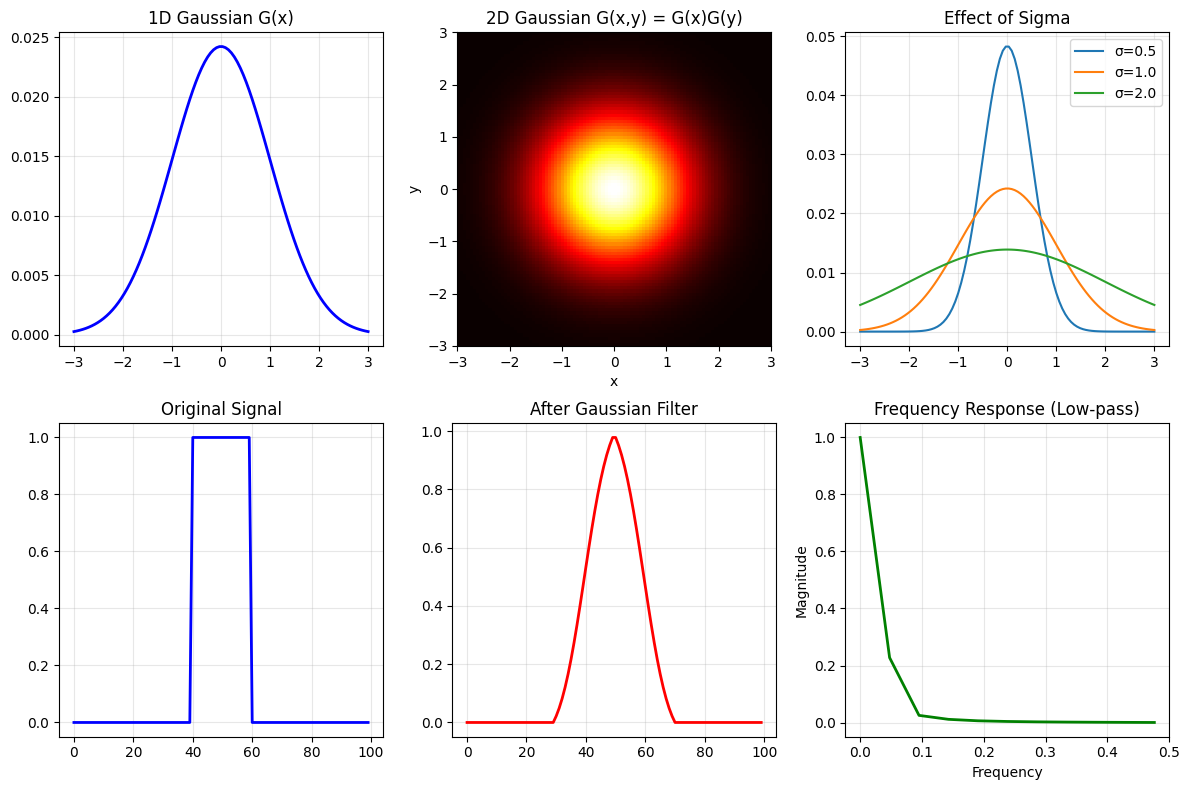


4. PRACTICAL FORMULAS
   Kernel size: N = 2 × ceil(3σ) + 1
   FWHM: 2.355 × σ
   Cutoff frequency: f_c = √(ln(2)/(2π²σ²))

5. COMMON APPLICATIONS
   • Noise reduction
   • Scale-space representation
   • Edge detection pre-processing
   • Image pyramids
   • Feature detection (LoG, DoG)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

print("="*60)
print("QUICK THEORY SUMMARY: GAUSSIAN FILTER")
print("="*60)

# 1. Mathematical Definition
print("\n1. MATHEMATICAL DEFINITION")
print("   Continuous 2D Gaussian:")
print("   G(x,y) = (1/(2πσ²)) * exp(-(x² + y²)/(2σ²))")
print("\n   Discrete kernel (normalized):")
print("   K[i,j] = exp(-(i² + j²)/(2σ²)) / Σexp(...)")

# 2. Key Properties
print("\n2. KEY PROPERTIES")
print("   • Symmetric: G(x,y) = G(-x,y) = G(x,-y) = G(-x,-y)")
print("   • Separable: G(x,y) = G(x) * G(y)")
print("   • Scale-space: Creates multi-resolution representation")
print("   • Fourier transform is also Gaussian")

# 3. Why Gaussian?
print("\n3. WHY GAUSSIAN IS SPECIAL")
print("   • Central Limit Theorem: Sum of many independent")
print("     random variables → Gaussian")
print("   • Minimizes time-bandwidth product (Heisenberg)")
print("   • Only rotationally symmetric separable filter")
print("   • Does not create new local extrema")

# 4. Visual Proof of Properties
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Property 1: Separability
x = np.linspace(-3, 3, 100)
sigma = 1.0
G_x = np.exp(-x**2/(2*sigma**2))
G_x = G_x / np.sum(G_x)

axes[0, 0].plot(x, G_x, 'b-', linewidth=2)
axes[0, 0].set_title('1D Gaussian G(x)')
axes[0, 0].grid(True, alpha=0.3)

# Property 2: 2D from 1D
X, Y = np.meshgrid(x, x)
G_xy = np.outer(G_x, G_x)

axes[0, 1].imshow(G_xy, cmap='hot', extent=[-3, 3, -3, 3])
axes[0, 1].set_title('2D Gaussian G(x,y) = G(x)G(y)')
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('y')

# Property 3: Different sigmas
axes[0, 2].clear()
for sigma in [0.5, 1.0, 2.0]:
    G = np.exp(-x**2/(2*sigma**2))
    G = G / np.sum(G)
    axes[0, 2].plot(x, G, label=f'σ={sigma}')
axes[0, 2].set_title('Effect of Sigma')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# Property 4: Convolution example
signal = np.zeros(100)
signal[40:60] = 1  # Square pulse

axes[1, 0].plot(signal, 'b-', linewidth=2)
axes[1, 0].set_title('Original Signal')
axes[1, 0].grid(True, alpha=0.3)

# Create Gaussian kernel
kernel_x = np.linspace(-3, 3, 21)
kernel = np.exp(-kernel_x**2/(2*sigma**2))
kernel = kernel / np.sum(kernel)

# Convolve
conv_result = np.convolve(signal, kernel, mode='same')

axes[1, 1].plot(conv_result, 'r-', linewidth=2)
axes[1, 1].set_title('After Gaussian Filter')
axes[1, 1].grid(True, alpha=0.3)

# Property 5: Frequency response
from scipy.fft import fft, fftfreq, fftshift

# Get frequency response
freqs = fftfreq(len(kernel), 1)
H = np.abs(fft(kernel))
H = fftshift(H)
freqs = fftshift(freqs)

axes[1, 2].plot(freqs[len(freqs)//2:], H[len(H)//2:], 'g-', linewidth=2)
axes[1, 2].set_title('Frequency Response (Low-pass)')
axes[1, 2].set_xlabel('Frequency')
axes[1, 2].set_ylabel('Magnitude')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n4. PRACTICAL FORMULAS")
print("   Kernel size: N = 2 × ceil(3σ) + 1")
print("   FWHM: 2.355 × σ")
print("   Cutoff frequency: f_c = √(ln(2)/(2π²σ²))")
print("\n5. COMMON APPLICATIONS")
print("   • Noise reduction")
print("   • Scale-space representation")
print("   • Edge detection pre-processing")
print("   • Image pyramids")
print("   • Feature detection (LoG, DoG)")